<a href="https://colab.research.google.com/github/LuniaKunal/Algo_Trading_in_Nifty-_50-_Stocks/blob/main/Unsupervised_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all the required modules / Libaries

In [ ]:
!pip install statsmodels

In [ ]:
!pip install DateTime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 8.0 MB/s eta 0:00:00


In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=0c8af85230be4929d5477148591cf24918e51050f185bdf7829edb96f073ffc4
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import DateTime as dt
import pandas_ta
import yfinance as yf
# import warnings

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
# Getting all the nifty 50 stocks symbols list

In [ ]:
nifty_50 = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[2]

In [ ]:
symbol_list = nifty_50['Symbol'].unique().tolist()

In [ ]:
append_str = ".NS"
symbol_list = [sub + append_str for sub in symbol_list]

In [ ]:
symbol_list

['ADANIENT.NS',
 'ADANIPORTS.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'ITC.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'LTIM.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NESTLEIND.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'UPL.NS',
 'WIPRO.NS']

In [ ]:
end_date = '2024-02-15'
start_date = pd.to_datetime(end_date) - pd.DateOffset(365*8)
start_date

Timestamp('2016-02-17 00:00:00')

In [ ]:
# Downloading the dataset using yf

In [ ]:
df = yf.download(tickers = symbol_list,
                 start = start_date,
                 end = end_date).stack()

[*********************100%%**********************]  50 of 50 completed


In [ ]:
df

Price                       Adj Close        Close         High          Low  \
Date       Ticker                                                              
2016-02-17 ADANIENT.NS      33.302738    34.356022    34.764698    32.966522   
           ADANIPORTS.NS   203.161240   212.500000   214.300003   196.300003   
           APOLLOHOSP.NS  1382.156494  1421.800049  1433.599976  1370.000000   
           ASIANPAINT.NS   810.810486   856.000000   858.950012   827.099976   
           AXISBANK.NS     393.986969   403.100006   406.899994   394.750000   
...                               ...          ...          ...          ...   
2024-02-14 TECHM.NS       1292.900024  1292.900024  1319.949951  1282.650024   
           TITAN.NS       3585.550049  3585.550049  3593.850098  3503.300049   
           ULTRACEMCO.NS  9787.799805  9787.799805  9824.849609  9703.950195   
           UPL.NS          481.399994   481.399994   482.399994   472.250000   
           WIPRO.NS        514.500000   514.500000   517.000000   497.049988   

Price                            Open      Volume  
Date       Ticker                                  
2016-02-17 ADANIENT.NS      34.410511   6460857.0  
           ADANIPORTS.NS   201.050003   6728882.0  
           APOLLOHOSP.NS  1420.050049    178587.0  
           ASIANPAINT.NS   844.000000   1171983.0  
           AXISBANK.NS     406.899994  10197761.0  
...                               ...         ...  
2024-02-14 TECHM.NS       1310.000000   3426103.0  
           TITAN.NS       3546.000000   1046318.0  
           ULTRACEMCO.NS  9802.049805    417802.0  
           UPL.NS          479.200012   3210526.0  
           WIPRO.NS        503.950012  11297328.0  

[97764 rows x 6 columns]

In [ ]:
# Data handling

In [ ]:
df.isnull().sum()

Price
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [ ]:
df.index.names = ['date', 'ticker']

In [ ]:
df.columns = df.columns.str.lower()
df.head()

Price                       adj close        close         high          low  \
date       ticker                                                              
2016-02-17 ADANIENT.NS      33.302738    34.356022    34.764698    32.966522   
           ADANIPORTS.NS   203.161240   212.500000   214.300003   196.300003   
           APOLLOHOSP.NS  1382.156494  1421.800049  1433.599976  1370.000000   
           ASIANPAINT.NS   810.810486   856.000000   858.950012   827.099976   
           AXISBANK.NS     393.986969   403.100006   406.899994   394.750000   

Price                            open      volume  
date       ticker                                  
2016-02-17 ADANIENT.NS      34.410511   6460857.0  
           ADANIPORTS.NS   201.050003   6728882.0  
           APOLLOHOSP.NS  1420.050049    178587.0  
           ASIANPAINT.NS   844.000000   1171983.0  
           AXISBANK.NS     406.899994  10197761.0

In [ ]:
# Calculate Features and indicators
# Garman-Klass Volatailty
# RSI
# Bollinger Bands
# ATR
# MACD


In [ ]:
df['garman_klass_vol'] = ((np.log(df['high']) - np.log(df['low']))**2)/2 - ((2*np.log(2)-1)*((np.log(df['adj close']) - np.log(df['open']))**2))

In [ ]:
df

Price                       adj close        close         high          low  \
date       ticker                                                              
2016-02-17 ADANIENT.NS      33.302738    34.356022    34.764698    32.966522   
           ADANIPORTS.NS   203.161240   212.500000   214.300003   196.300003   
           APOLLOHOSP.NS  1382.156494  1421.800049  1433.599976  1370.000000   
           ASIANPAINT.NS   810.810486   856.000000   858.950012   827.099976   
           AXISBANK.NS     393.986969   403.100006   406.899994   394.750000   
...                               ...          ...          ...          ...   
2024-02-14 TECHM.NS       1292.900024  1292.900024  1319.949951  1282.650024   
           TITAN.NS       3585.550049  3585.550049  3593.850098  3503.300049   
           ULTRACEMCO.NS  9787.799805  9787.799805  9824.849609  9703.950195   
           UPL.NS          481.399994   481.399994   482.399994   472.250000   
           WIPRO.NS        514.500000   514.500000   517.000000   497.049988   

Price                            open      volume  garman_klass_vol  
date       ticker                                                    
2016-02-17 ADANIENT.NS      34.410511   6460857.0          0.000997  
           ADANIPORTS.NS   201.050003   6728882.0          0.003806  
           APOLLOHOSP.NS  1420.050049    178587.0          0.000747  
           ASIANPAINT.NS   844.000000   1171983.0          0.000092  
           AXISBANK.NS     406.899994  10197761.0          0.000058  
...                               ...         ...               ...  
2024-02-14 TECHM.NS       1310.000000   3426103.0          0.000344  
           TITAN.NS       3546.000000   1046318.0          0.000278  
           ULTRACEMCO.NS  9802.049805    417802.0          0.000076  
           UPL.NS          479.200012   3210526.0          0.000218  
           WIPRO.NS        503.950012  11297328.0          0.000608  

[97764 rows x 7 columns]

In [ ]:
# rsi
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close = x, length =20))

In [ ]:
df

Price                       adj close        close         high          low  \
date       ticker                                                              
2016-02-17 ADANIENT.NS      33.302738    34.356022    34.764698    32.966522   
           ADANIPORTS.NS   203.161240   212.500000   214.300003   196.300003   
           APOLLOHOSP.NS  1382.156494  1421.800049  1433.599976  1370.000000   
           ASIANPAINT.NS   810.810486   856.000000   858.950012   827.099976   
           AXISBANK.NS     393.986969   403.100006   406.899994   394.750000   
...                               ...          ...          ...          ...   
2024-02-14 TECHM.NS       1292.900024  1292.900024  1319.949951  1282.650024   
           TITAN.NS       3585.550049  3585.550049  3593.850098  3503.300049   
           ULTRACEMCO.NS  9787.799805  9787.799805  9824.849609  9703.950195   
           UPL.NS          481.399994   481.399994   482.399994   472.250000   
           WIPRO.NS        514.500000   514.500000   517.000000   497.049988   

Price                            open      volume  garman_klass_vol        rsi  
date       ticker                                                               
2016-02-17 ADANIENT.NS      34.410511   6460857.0          0.000997        NaN  
           ADANIPORTS.NS   201.050003   6728882.0          0.003806        NaN  
           APOLLOHOSP.NS  1420.050049    178587.0          0.000747        NaN  
           ASIANPAINT.NS   844.000000   1171983.0          0.000092        NaN  
           AXISBANK.NS     406.899994  10197761.0          0.000058        NaN  
...                               ...         ...               ...        ...  
2024-02-14 TECHM.NS       1310.000000   3426103.0          0.000344  49.043738  
           TITAN.NS       3546.000000   1046318.0          0.000278  46.621005  
           ULTRACEMCO.NS  9802.049805    417802.0          0.000076  48.331476  
           UPL.NS          479.200012   3210526.0          0.000218  34.773148  
           WIPRO.NS        503.950012  11297328.0          0.000608  66.916447  

[97764 rows x 8 columns]

In [ ]:
df.isnull().sum()

Price
adj close              0
close                  0
high                   0
low                    0
open                   0
volume                 0
garman_klass_vol       0
rsi                 1000
dtype: int64

In [ ]:
# Bolinger Bands
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close = np.log1p(x), length =20).iloc[:,0])
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close = np.log1p(x), length =20).iloc[:,1])
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close = np.log1p(x), length =20).iloc[:,2])

In [ ]:
df

Price                       adj close        close         high          low  \
date       ticker                                                              
2016-02-17 ADANIENT.NS      33.302738    34.356022    34.764698    32.966522   
           ADANIPORTS.NS   203.161240   212.500000   214.300003   196.300003   
           APOLLOHOSP.NS  1382.156494  1421.800049  1433.599976  1370.000000   
           ASIANPAINT.NS   810.810486   856.000000   858.950012   827.099976   
           AXISBANK.NS     393.986969   403.100006   406.899994   394.750000   
...                               ...          ...          ...          ...   
2024-02-14 TECHM.NS       1292.900024  1292.900024  1319.949951  1282.650024   
           TITAN.NS       3585.550049  3585.550049  3593.850098  3503.300049   
           ULTRACEMCO.NS  9787.799805  9787.799805  9824.849609  9703.950195   
           UPL.NS          481.399994   481.399994   482.399994   472.250000   
           WIPRO.NS        514.500000   514.500000   517.000000   497.049988   

Price                            open      volume  garman_klass_vol  \
date       ticker                                                     
2016-02-17 ADANIENT.NS      34.410511   6460857.0          0.000997   
           ADANIPORTS.NS   201.050003   6728882.0          0.003806   
           APOLLOHOSP.NS  1420.050049    178587.0          0.000747   
           ASIANPAINT.NS   844.000000   1171983.0          0.000092   
           AXISBANK.NS     406.899994  10197761.0          0.000058   
...                               ...         ...               ...   
2024-02-14 TECHM.NS       1310.000000   3426103.0          0.000344   
           TITAN.NS       3546.000000   1046318.0          0.000278   
           ULTRACEMCO.NS  9802.049805    417802.0          0.000076   
           UPL.NS          479.200012   3210526.0          0.000218   
           WIPRO.NS        503.950012  11297328.0          0.000608   

Price                           rsi    bb_low    bb_mid   bb_high  
date       ticker                                                  
2016-02-17 ADANIENT.NS          NaN       NaN       NaN       NaN  
           ADANIPORTS.NS        NaN       NaN       NaN       NaN  
           APOLLOHOSP.NS        NaN       NaN       NaN       NaN  
           ASIANPAINT.NS        NaN       NaN       NaN       NaN  
           AXISBANK.NS          NaN       NaN       NaN       NaN  
...                             ...       ...       ...       ...  
2024-02-14 TECHM.NS       49.043738  7.155139  7.196010  7.236880  
           TITAN.NS       46.621005  8.152530  8.210148  8.267765  
           ULTRACEMCO.NS  48.331476  9.183917  9.209189  9.234462  
           UPL.NS         34.773148  6.101093  6.241991  6.382889  
           WIPRO.NS       66.916447  6.134540  6.186905  6.239271  

[97764 rows x 11 columns]

In [ ]:
# atr
# pandas_ta.atr(high = df['high'],
#               low = df['low'],
#               close = df['close'],
#               length = 14)

def compute_atr(stock_data):
  atr  = pandas_ta.atr(high = stock_data['high'],
              low = stock_data['low'],
              close = stock_data['close'],
              length = 14)
  return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level = 1, group_keys = False).apply(compute_atr)

In [ ]:
df

Price                       adj close        close         high          low  \
date       ticker                                                              
2016-02-17 ADANIENT.NS      33.302738    34.356022    34.764698    32.966522   
           ADANIPORTS.NS   203.161240   212.500000   214.300003   196.300003   
           APOLLOHOSP.NS  1382.156494  1421.800049  1433.599976  1370.000000   
           ASIANPAINT.NS   810.810486   856.000000   858.950012   827.099976   
           AXISBANK.NS     393.986969   403.100006   406.899994   394.750000   
...                               ...          ...          ...          ...   
2024-02-14 TECHM.NS       1292.900024  1292.900024  1319.949951  1282.650024   
           TITAN.NS       3585.550049  3585.550049  3593.850098  3503.300049   
           ULTRACEMCO.NS  9787.799805  9787.799805  9824.849609  9703.950195   
           UPL.NS          481.399994   481.399994   482.399994   472.250000   
           WIPRO.NS        514.500000   514.500000   517.000000   497.049988   

Price                            open      volume  garman_klass_vol  \
date       ticker                                                     
2016-02-17 ADANIENT.NS      34.410511   6460857.0          0.000997   
           ADANIPORTS.NS   201.050003   6728882.0          0.003806   
           APOLLOHOSP.NS  1420.050049    178587.0          0.000747   
           ASIANPAINT.NS   844.000000   1171983.0          0.000092   
           AXISBANK.NS     406.899994  10197761.0          0.000058   
...                               ...         ...               ...   
2024-02-14 TECHM.NS       1310.000000   3426103.0          0.000344   
           TITAN.NS       3546.000000   1046318.0          0.000278   
           ULTRACEMCO.NS  9802.049805    417802.0          0.000076   
           UPL.NS          479.200012   3210526.0          0.000218   
           WIPRO.NS        503.950012  11297328.0          0.000608   

Price                           rsi    bb_low    bb_mid   bb_high       atr  
date       ticker                                                            
2016-02-17 ADANIENT.NS          NaN       NaN       NaN       NaN       NaN  
           ADANIPORTS.NS        NaN       NaN       NaN       NaN       NaN  
           APOLLOHOSP.NS        NaN       NaN       NaN       NaN       NaN  
           ASIANPAINT.NS        NaN       NaN       NaN       NaN       NaN  
           AXISBANK.NS          NaN       NaN       NaN       NaN       NaN  
...                             ...       ...       ...       ...       ...  
2024-02-14 TECHM.NS       49.043738  7.155139  7.196010  7.236880  1.208973  
           TITAN.NS       46.621005  8.152530  8.210148  8.267765  2.412215  
           ULTRACEMCO.NS  48.331476  9.183917  9.209189  9.234462  2.335421  
           UPL.NS         34.773148  6.101093  6.241991  6.382889 -0.204481  
           WIPRO.NS       66.916447  6.134540  6.186905  6.239271  1.846867  

[97764 rows x 12 columns]

In [ ]:
# macd
def compute_macd(close):
  macd = pandas_ta.macd(close=close, length = 20).iloc[:,0]
  return macd.sub(macd.mean()).div(macd.std())


df['macd'] = df.groupby(level = 1, group_keys = False)['adj close'].apply(compute_macd)


In [ ]:
df

Price                       adj close        close         high          low  \
date       ticker                                                              
2016-02-17 ADANIENT.NS      33.302738    34.356022    34.764698    32.966522   
           ADANIPORTS.NS   203.161240   212.500000   214.300003   196.300003   
           APOLLOHOSP.NS  1382.156494  1421.800049  1433.599976  1370.000000   
           ASIANPAINT.NS   810.810486   856.000000   858.950012   827.099976   
           AXISBANK.NS     393.986969   403.100006   406.899994   394.750000   
...                               ...          ...          ...          ...   
2024-02-14 TECHM.NS       1292.900024  1292.900024  1319.949951  1282.650024   
           TITAN.NS       3585.550049  3585.550049  3593.850098  3503.300049   
           ULTRACEMCO.NS  9787.799805  9787.799805  9824.849609  9703.950195   
           UPL.NS          481.399994   481.399994   482.399994   472.250000   
           WIPRO.NS        514.500000   514.500000   517.000000   497.049988   

Price                            open      volume  garman_klass_vol  \
date       ticker                                                     
2016-02-17 ADANIENT.NS      34.410511   6460857.0          0.000997   
           ADANIPORTS.NS   201.050003   6728882.0          0.003806   
           APOLLOHOSP.NS  1420.050049    178587.0          0.000747   
           ASIANPAINT.NS   844.000000   1171983.0          0.000092   
           AXISBANK.NS     406.899994  10197761.0          0.000058   
...                               ...         ...               ...   
2024-02-14 TECHM.NS       1310.000000   3426103.0          0.000344   
           TITAN.NS       3546.000000   1046318.0          0.000278   
           ULTRACEMCO.NS  9802.049805    417802.0          0.000076   
           UPL.NS          479.200012   3210526.0          0.000218   
           WIPRO.NS        503.950012  11297328.0          0.000608   

Price                           rsi    bb_low    bb_mid   bb_high       atr  \
date       ticker                                                             
2016-02-17 ADANIENT.NS          NaN       NaN       NaN       NaN       NaN   
           ADANIPORTS.NS        NaN       NaN       NaN       NaN       NaN   
           APOLLOHOSP.NS        NaN       NaN       NaN       NaN       NaN   
           ASIANPAINT.NS        NaN       NaN       NaN       NaN       NaN   
           AXISBANK.NS          NaN       NaN       NaN       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2024-02-14 TECHM.NS       49.043738  7.155139  7.196010  7.236880  1.208973   
           TITAN.NS       46.621005  8.152530  8.210148  8.267765  2.412215   
           ULTRACEMCO.NS  48.331476  9.183917  9.209189  9.234462  2.335421   
           UPL.NS         34.773148  6.101093  6.241991  6.382889 -0.204481   
           WIPRO.NS       66.916447  6.134540  6.186905  6.239271  1.846867   

Price                         macd  
date       ticker                   
2016-02-17 ADANIENT.NS         NaN  
           ADANIPORTS.NS       NaN  
           APOLLOHOSP.NS       NaN  
           ASIANPAINT.NS       NaN  
           AXISBANK.NS         NaN  
...                            ...  
2024-02-14 TECHM.NS       0.189074  
           TITAN.NS      -1.363393  
           ULTRACEMCO.NS -0.197596  
           UPL.NS        -2.134123  
           WIPRO.NS       1.587935  

[97764 rows x 13 columns]

In [ ]:
df['rup_vol'] = (df['adj close']*df['volume'])/1e6
df

Price                       adj close        close         high          low  \
date       ticker                                                              
2016-02-17 ADANIENT.NS      33.302738    34.356022    34.764698    32.966522   
           ADANIPORTS.NS   203.161240   212.500000   214.300003   196.300003   
           APOLLOHOSP.NS  1382.156494  1421.800049  1433.599976  1370.000000   
           ASIANPAINT.NS   810.810486   856.000000   858.950012   827.099976   
           AXISBANK.NS     393.986969   403.100006   406.899994   394.750000   
...                               ...          ...          ...          ...   
2024-02-14 TECHM.NS       1292.900024  1292.900024  1319.949951  1282.650024   
           TITAN.NS       3585.550049  3585.550049  3593.850098  3503.300049   
           ULTRACEMCO.NS  9787.799805  9787.799805  9824.849609  9703.950195   
           UPL.NS          481.399994   481.399994   482.399994   472.250000   
           WIPRO.NS        514.500000   514.500000   517.000000   497.049988   

Price                            open      volume  garman_klass_vol  \
date       ticker                                                     
2016-02-17 ADANIENT.NS      34.410511   6460857.0          0.000997   
           ADANIPORTS.NS   201.050003   6728882.0          0.003806   
           APOLLOHOSP.NS  1420.050049    178587.0          0.000747   
           ASIANPAINT.NS   844.000000   1171983.0          0.000092   
           AXISBANK.NS     406.899994  10197761.0          0.000058   
...                               ...         ...               ...   
2024-02-14 TECHM.NS       1310.000000   3426103.0          0.000344   
           TITAN.NS       3546.000000   1046318.0          0.000278   
           ULTRACEMCO.NS  9802.049805    417802.0          0.000076   
           UPL.NS          479.200012   3210526.0          0.000218   
           WIPRO.NS        503.950012  11297328.0          0.000608   

Price                           rsi    bb_low    bb_mid   bb_high       atr  \
date       ticker                                                             
2016-02-17 ADANIENT.NS          NaN       NaN       NaN       NaN       NaN   
           ADANIPORTS.NS        NaN       NaN       NaN       NaN       NaN   
           APOLLOHOSP.NS        NaN       NaN       NaN       NaN       NaN   
           ASIANPAINT.NS        NaN       NaN       NaN       NaN       NaN   
           AXISBANK.NS          NaN       NaN       NaN       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2024-02-14 TECHM.NS       49.043738  7.155139  7.196010  7.236880  1.208973   
           TITAN.NS       46.621005  8.152530  8.210148  8.267765  2.412215   
           ULTRACEMCO.NS  48.331476  9.183917  9.209189  9.234462  2.335421   
           UPL.NS         34.773148  6.101093  6.241991  6.382889 -0.204481   
           WIPRO.NS       66.916447  6.134540  6.186905  6.239271  1.846867   

Price                         macd      rup_vol  
date       ticker                                
2016-02-17 ADANIENT.NS         NaN   215.164229  
           ADANIPORTS.NS       NaN  1367.048008  
           APOLLOHOSP.NS       NaN   246.835182  
           ASIANPAINT.NS       NaN   950.256106  
           AXISBANK.NS         NaN  4017.784947  
...                            ...          ...  
2024-02-14 TECHM.NS       0.189074  4429.608652  
           TITAN.NS      -1.363393  3751.625556  
           ULTRACEMCO.NS -0.197596  4089.362334  
           UPL.NS        -2.134123  1545.547197  
           WIPRO.NS       1.587935  5812.475256  

[97764 rows x 14 columns]

In [ ]:

df

Price                       adj close        close         high          low  \
date       ticker                                                              
2016-03-28 ADANIENT.NS      36.519371    37.271244    39.069420    37.080528   
           ADANIPORTS.NS   226.314774   235.649994   242.949997   232.699997   
           APOLLOHOSP.NS  1342.458130  1375.050049  1406.400024  1367.050049   
           ASIANPAINT.NS   800.770142   845.400024   857.450012   842.700012   
           AXISBANK.NS     413.339355   422.899994   438.600006   419.799988   
...                               ...          ...          ...          ...   
2024-02-14 TECHM.NS       1292.900024  1292.900024  1319.949951  1282.650024   
           TITAN.NS       3585.550049  3585.550049  3593.850098  3503.300049   
           ULTRACEMCO.NS  9787.799805  9787.799805  9824.849609  9703.950195   
           UPL.NS          481.399994   481.399994   482.399994   472.250000   
           WIPRO.NS        514.500000   514.500000   517.000000   497.049988   

Price                            open      volume  garman_klass_vol  \
date       ticker                                                     
2016-03-28 ADANIENT.NS      38.933193   4467554.0         -0.000218   
           ADANIPORTS.NS   240.399994   2756755.0         -0.000479   
           APOLLOHOSP.NS  1398.400024    128023.0         -0.000241   
           ASIANPAINT.NS   850.000000   1722071.0         -0.001225   
           AXISBANK.NS     437.850006   9200929.0         -0.000322   
...                               ...         ...               ...   
2024-02-14 TECHM.NS       1310.000000   3426103.0          0.000344   
           TITAN.NS       3546.000000   1046318.0          0.000278   
           ULTRACEMCO.NS  9802.049805    417802.0          0.000076   
           UPL.NS          479.200012   3210526.0          0.000218   
           WIPRO.NS        503.950012  11297328.0          0.000608   

Price                           rsi    bb_low    bb_mid   bb_high       atr  \
date       ticker                                                             
2016-03-28 ADANIENT.NS    63.386525  3.461848  3.565778  3.669709 -0.739285   
           ADANIPORTS.NS  64.418418  5.248532  5.376643  5.504755 -0.944689   
           APOLLOHOSP.NS  42.002173  7.173604  7.226109  7.278614 -0.756209   
           ASIANPAINT.NS  42.414705  6.680297  6.715905  6.751513 -1.206262   
           AXISBANK.NS    55.736748  5.913882  6.006388  6.098894 -1.050685   
...                             ...       ...       ...       ...       ...   
2024-02-14 TECHM.NS       49.043738  7.155139  7.196010  7.236880  1.208973   
           TITAN.NS       46.621005  8.152530  8.210148  8.267765  2.412215   
           ULTRACEMCO.NS  48.331476  9.183917  9.209189  9.234462  2.335421   
           UPL.NS         34.773148  6.101093  6.241991  6.382889 -0.204481   
           WIPRO.NS       66.916447  6.134540  6.186905  6.239271  1.846867   

Price                         macd      rup_vol  
date       ticker                                
2016-03-28 ADANIENT.NS   -0.131909   163.152262  
           ADANIPORTS.NS  0.539439   623.894384  
           APOLLOHOSP.NS -0.580071   171.865517  
           ASIANPAINT.NS -0.326968  1378.983039  
           AXISBANK.NS    0.897977  3803.106063  
...                            ...          ...  
2024-02-14 TECHM.NS       0.189074  4429.608652  
           TITAN.NS      -1.363393  3751.625556  
           ULTRACEMCO.NS -0.197596  4089.362334  
           UPL.NS        -2.134123  1545.547197  
           WIPRO.NS       1.587935  5812.475256  

[96514 rows x 14 columns]

In [ ]:
last_cols = [c for c in df.columns.unique(0) if c not in ['rup_vol', 'volume', 'open',
                                                          'high', 'low', 'close']]

data = (pd.concat([df.unstack('ticker')['rup_vol'].resample('M').mean().stack('ticker').to_frame('rup_vol'),
                   df.unstack()[last_cols].resample('M').last().stack('ticker')],
                  axis=1)).dropna()

data

rup_vol    adj close       atr   bb_high  \
date       ticker                                                        
2016-03-31 ADANIENT.NS     239.251270    39.402477 -0.737730  3.695146   
           ADANIPORTS.NS   692.293014   237.887421 -0.924721  5.493406   
           APOLLOHOSP.NS   369.393648  1297.792725 -0.706260  7.275262   
           ASIANPAINT.NS  1221.030371   822.555908 -1.186669  6.751814   
           AXISBANK.NS    4063.257964   434.108948 -1.028951  6.093734   
...                               ...          ...       ...       ...   
2024-02-29 TECHM.NS       2493.012236  1292.900024  1.208973  7.236880   
           TITAN.NS       4174.624382  3585.550049  2.412215  8.267765   
           ULTRACEMCO.NS  2996.903224  9787.799805  2.335421  9.234462   
           UPL.NS         3219.440374   481.399994 -0.204481  6.382889   
           WIPRO.NS       4656.433301   514.500000  1.846867  6.239271   

                            bb_low    bb_mid  garman_klass_vol      macd  \
date       ticker                                                          
2016-03-31 ADANIENT.NS    3.490646  3.592896          0.000513 -0.129757   
           ADANIPORTS.NS  5.322734  5.408070         -0.000094  0.526674   
           APOLLOHOSP.NS  7.152670  7.213966          0.000802 -0.688876   
           ASIANPAINT.NS  6.684154  6.717984         -0.001550 -0.278675   
           AXISBANK.NS    5.962331  6.028032          0.000112  0.863602   
...                            ...       ...               ...       ...   
2024-02-29 TECHM.NS       7.155139  7.196010          0.000344  0.189074   
           TITAN.NS       8.152530  8.210148          0.000278 -1.363393   
           ULTRACEMCO.NS  9.183917  9.209189          0.000076 -0.197596   
           UPL.NS         6.101093  6.241991          0.000218 -2.134123   
           WIPRO.NS       6.134540  6.186905          0.000608  1.587935   

                                rsi  
date       ticker                    
2016-03-31 ADANIENT.NS    71.790854  
           ADANIPORTS.NS  71.773606  
           APOLLOHOSP.NS  35.263319  
           ASIANPAINT.NS  50.802527  
           AXISBANK.NS    64.514465  
...                             ...  
2024-02-29 TECHM.NS       49.043738  
           TITAN.NS       46.621005  
           ULTRACEMCO.NS  48.331476  
           UPL.NS         34.773148  
           WIPRO.NS       66.916447  

[4754 rows x 9 columns]

In [ ]:
# g = df.xs('WIPRO.NS', level = 1)
# g
def calculate_returns(df):
  outlier_cutoff = 0.005

  lags = [1, 2, 3, 6, 9, 12]

  for lag in lags:
    df[f'return_{lag}m'] = (df['adj close']
                         .pct_change(lag)
                         .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                upper= x.quantile(1- outlier_cutoff)))
                         .add(1)
                         .pow(1/lag)
                         .sub(1))
  return df

data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

data


rup_vol    adj close       atr   bb_high  \
date       ticker                                                        
2017-03-31 ADANIENT.NS     416.894681    57.955814 -0.731771  4.094287   
           ADANIPORTS.NS  1179.635345   326.146820 -0.935851  5.799313   
           APOLLOHOSP.NS  1006.182855  1137.533203 -1.041446  7.123417   
           ASIANPAINT.NS   865.410789  1024.793335 -1.201703  6.956817   
           AXISBANK.NS    4078.689859   484.190033 -0.963398  6.255885   
...                               ...          ...       ...       ...   
2024-02-29 TECHM.NS       2493.012236  1292.900024  1.208973  7.236880   
           TITAN.NS       4174.624382  3585.550049  2.412215  8.267765   
           ULTRACEMCO.NS  2996.903224  9787.799805  2.335421  9.234462   
           UPL.NS         3219.440374   481.399994 -0.204481  6.382889   
           WIPRO.NS       4656.433301   514.500000  1.846867  6.239271   

                            bb_low    bb_mid  garman_klass_vol      macd  \
date       ticker                                                          
2017-03-31 ADANIENT.NS    3.917253  4.005770          0.001078 -0.129334   
           ADANIPORTS.NS  5.645352  5.722332         -0.000675  0.278173   
           APOLLOHOSP.NS  7.013172  7.068295          0.000036 -0.623282   
           ASIANPAINT.NS  6.874274  6.915546         -0.000628  0.202013   
           AXISBANK.NS    6.165180  6.210532          0.000067 -0.235638   
...                            ...       ...               ...       ...   
2024-02-29 TECHM.NS       7.155139  7.196010          0.000344  0.189074   
           TITAN.NS       8.152530  8.210148          0.000278 -1.363393   
           ULTRACEMCO.NS  9.183917  9.209189          0.000076 -0.197596   
           UPL.NS         6.101093  6.241991          0.000218 -2.134123   
           WIPRO.NS       6.134540  6.186905          0.000608  1.587935   

                                rsi  return_1m  return_2m  return_3m  \
date       ticker                                                      
2017-03-31 ADANIENT.NS    67.437659   0.102030   0.116044   0.123470   
           ADANIPORTS.NS  68.082275   0.125435   0.075947   0.081520   
           APOLLOHOSP.NS  39.940313  -0.104867  -0.026739  -0.004185   
           ASIANPAINT.NS  61.406738   0.048135   0.051619   0.064061   
           AXISBANK.NS    47.576601  -0.031284   0.026264   0.029390   
...                             ...        ...        ...        ...   
2024-02-29 TECHM.NS       49.043738  -0.030555   0.007924   0.019269   
           TITAN.NS       46.621005  -0.030290  -0.012305   0.008986   
           ULTRACEMCO.NS  48.331476  -0.037330  -0.034650   0.028227   
           UPL.NS         34.773148  -0.104705  -0.094598  -0.055115   
           WIPRO.NS       66.916447   0.076022   0.045940   0.076720   

                          return_6m  return_9m  return_12m  
date       ticker                                           
2017-03-31 ADANIENT.NS     0.087287   0.025222    0.032677  
           ADANIPORTS.NS   0.047714   0.056632    0.026645  
           APOLLOHOSP.NS  -0.019764  -0.013395   -0.010923  
           ASIANPAINT.NS  -0.012524   0.007820    0.018488  
           AXISBANK.NS    -0.016205  -0.008201    0.009140  
...                             ...        ...         ...  
2024-02-29 TECHM.NS        0.014042   0.023628    0.018841  
           TITAN.NS        0.024303   0.027283    0.035281  
           ULTRACEMCO.NS   0.027914   0.025045    0.025583  
           UPL.NS         -0.033649  -0.036707   -0.028728  
           WIPRO.NS        0.039611   0.027571    0.024186  

[4154 rows x 15 columns]

In [ ]:
# download fama-french factors and calculate rolling factor
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                               'famafrench',
                               start='2010')[0].drop('RF', axis=1)

factor_data.index = factor_data.index.to_timestamp()

factor_data = factor_data.resample('M').last().div(100)

factor_data.index.name = 'date'

factor_data = factor_data.join(data['return_1m']).sort_index()

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                          
2017-03-31 ADANIENT.NS    0.0017  0.0074 -0.0335  0.0061 -0.0094   0.102030
           ADANIPORTS.NS  0.0017  0.0074 -0.0335  0.0061 -0.0094   0.125435
           APOLLOHOSP.NS  0.0017  0.0074 -0.0335  0.0061 -0.0094  -0.104867
           ASIANPAINT.NS  0.0017  0.0074 -0.0335  0.0061 -0.0094   0.048135
           AXISBANK.NS    0.0017  0.0074 -0.0335  0.0061 -0.0094  -0.031284
...                          ...     ...     ...     ...     ...        ...
2023-12-31 TECHM.NS       0.0485  0.0732  0.0494 -0.0307  0.0132   0.042344
           TITAN.NS       0.0485  0.0732  0.0494 -0.0307  0.0132   0.052956
           ULTRACEMCO.NS  0.0485  0.0732  0.0494 -0.0307  0.0132   0.166532
           UPL.NS         0.0485  0.0732  0.0494 -0.0307  0.0132   0.029090
           WIPRO.NS       0.0485  0.0732  0.0494 -0.0307  0.0132   0.141024

[4054 rows x 6 columns]

In [ ]:
factor_data.xs('RELIANCE.NS',level=1).head()

,Mkt-RF,SMB,HML,RMW,CMA,return_1m
date,,,,,,
2017-03-31,0.0017,0.0074,-0.0335,0.0061,-0.0094,0.066920
2017-04-30,0.0109,0.0048,-0.0213,0.0190,-0.0160,0.056249
2017-05-31,0.0106,-0.0306,-0.0378,0.0095,-0.0179,-0.039062
2017-06-30,0.0078,0.0258,0.0148,-0.0222,0.0000,0.029313
2017-07-31,0.0187,-0.0169,-0.0031,-0.0064,-0.0020,0.179739


In [ ]:
# filtering out stocks with less than 10 months of data for having good amount of data to train

factor_data.groupby(level=1).size()

ticker
ADANIENT.NS      82
ADANIPORTS.NS    82
APOLLOHOSP.NS    82
ASIANPAINT.NS    82
AXISBANK.NS      82
BAJAJ-AUTO.NS    82
BAJAJFINSV.NS    82
BAJFINANCE.NS    82
BHARTIARTL.NS    82
BPCL.NS          82
BRITANNIA.NS     82
CIPLA.NS         82
COALINDIA.NS     82
DIVISLAB.NS      82
DRREDDY.NS       82
EICHERMOT.NS     82
GRASIM.NS        82
HCLTECH.NS       82
HDFCBANK.NS      82
HDFCLIFE.NS      61
HEROMOTOCO.NS    82
HINDALCO.NS      82
HINDUNILVR.NS    82
ICICIBANK.NS     82
INDUSINDBK.NS    82
INFY.NS          82
ITC.NS           82
JSWSTEEL.NS      82
KOTAKBANK.NS     82
LT.NS            82
LTIM.NS          77
M&M.NS           82
MARUTI.NS        82
NESTLEIND.NS     82
NTPC.NS          82
ONGC.NS          82
POWERGRID.NS     82
RELIANCE.NS      82
SBILIFE.NS       62
SBIN.NS          82
SUNPHARMA.NS     82
TATACONSUM.NS    82
TATAMOTORS.NS    82
TATASTEEL.NS     82
TCS.NS           82
TECHM.NS         82
TITAN.NS         82
ULTRACEMCO.NS    82
UPL.NS           82
WIPRO.NS     

In [ ]:
# Calculate the rolling factor betas
betas = (factor_data.groupby(level=1,
                            group_keys=False)
         .apply(lambda x: RollingOLS(endog=x['return_1m'],
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                     window=min(24, x.shape[0]),
                                     min_nobs=len(x.columns)+1)
         .fit(params_only=True)
         .params
         .drop('const', axis=1)))

betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                         
2017-03-31 ADANIENT.NS         NaN       NaN       NaN       NaN       NaN
           ADANIPORTS.NS       NaN       NaN       NaN       NaN       NaN
           APOLLOHOSP.NS       NaN       NaN       NaN       NaN       NaN
           ASIANPAINT.NS       NaN       NaN       NaN       NaN       NaN
           AXISBANK.NS         NaN       NaN       NaN       NaN       NaN
...                            ...       ...       ...       ...       ...
2023-12-31 TECHM.NS       0.854022 -0.203819 -0.140365 -0.530616 -0.328794
           TITAN.NS       0.591866 -0.457480  0.010236 -0.744098 -0.287911
           ULTRACEMCO.NS  0.719574  0.252664  0.002453  0.210155 -0.241784
           UPL.NS         1.133841 -0.686002 -0.133437 -0.149138  0.807210
           WIPRO.NS       0.737352  0.280014 -0.425239 -0.604792  0.355456

[4054 rows x 5 columns]

In [ ]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

data = (data.join(betas.groupby('ticker').shift()))

data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

data = data.drop('adj close', axis=1)

data = data.dropna()


ValueError: columns overlap but no suffix specified: Index(['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'], dtype='object')

In [ ]:
data = data.drop('rup_vol',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4154 entries, (Timestamp('2017-03-31 00:00:00', freq='M'), 'ADANIENT.NS') to (Timestamp('2024-02-29 00:00:00', freq='M'), 'WIPRO.NS')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   atr               4154 non-null   float64
 1   bb_high           4154 non-null   float64
 2   bb_low            4154 non-null   float64
 3   bb_mid            4154 non-null   float64
 4   garman_klass_vol  4154 non-null   float64
 5   macd              4154 non-null   float64
 6   rsi               4154 non-null   float64
 7   return_1m         4154 non-null   float64
 8   return_2m         4154 non-null   float64
 9   return_3m         4154 non-null   float64
 10  return_6m         4154 non-null   float64
 11  return_9m         4154 non-null   float64
 12  return_12m        4154 non-null   float64
 13  Mkt-RF            4154 non-null   float64
 14  SMB               4154 non

In [ ]:
# K- Means Clustering
from sklearn.cluster import KMeans

def get_clusters(df):
  df['cluster'] = KMeans(n_clusters=4,
                         random_state=0,
                         init='random').fit(df).labels_
  return df

data = data.dropna().groupby('date', group_keys= False).apply(get_clusters)

data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

atr   bb_high    bb_low    bb_mid  \
date       ticker                                                  
2017-03-31 ADANIENT.NS   -0.731771  4.094287  3.917253  4.005770   
           ADANIPORTS.NS -0.935851  5.799313  5.645352  5.722332   
           APOLLOHOSP.NS -1.041446  7.123417  7.013172  7.068295   
           ASIANPAINT.NS -1.201703  6.956817  6.874274  6.915546   
           AXISBANK.NS   -0.963398  6.255885  6.165180  6.210532   
...                            ...       ...       ...       ...   
2024-02-29 TECHM.NS       1.208973  7.236880  7.155139  7.196010   
           TITAN.NS       2.412215  8.267765  8.152530  8.210148   
           ULTRACEMCO.NS  2.335421  9.234462  9.183917  9.209189   
           UPL.NS        -0.204481  6.382889  6.101093  6.241991   
           WIPRO.NS       1.846867  6.239271  6.134540  6.186905   

                          garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                            
2017-03-31 ADANIENT.NS            0.001078 -0.129334  67.437659   0.102030   
           ADANIPORTS.NS         -0.000675  0.278173  68.082275   0.125435   
           APOLLOHOSP.NS          0.000036 -0.623282  39.940313  -0.104867   
           ASIANPAINT.NS         -0.000628  0.202013  61.406738   0.048135   
           AXISBANK.NS            0.000067 -0.235638  47.576601  -0.031284   
...                                    ...       ...        ...        ...   
2024-02-29 TECHM.NS               0.000344  0.189074  49.043738  -0.030555   
           TITAN.NS               0.000278 -1.363393  46.621005  -0.030290   
           ULTRACEMCO.NS          0.000076 -0.197596  48.331476  -0.037330   
           UPL.NS                 0.000218 -2.134123  34.773148  -0.104705   
           WIPRO.NS               0.000608  1.587935  66.916447   0.076022   

                          return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                      
2017-03-31 ADANIENT.NS     0.116044   0.123470   0.087287   0.025222   
           ADANIPORTS.NS   0.075947   0.081520   0.047714   0.056632   
           APOLLOHOSP.NS  -0.026739  -0.004185  -0.019764  -0.013395   
           ASIANPAINT.NS   0.051619   0.064061  -0.012524   0.007820   
           AXISBANK.NS     0.026264   0.029390  -0.016205  -0.008201   
...                             ...        ...        ...        ...   
2024-02-29 TECHM.NS        0.007924   0.019269   0.014042   0.023628   
           TITAN.NS       -0.012305   0.008986   0.024303   0.027283   
           ULTRACEMCO.NS  -0.034650   0.028227   0.027914   0.025045   
           UPL.NS         -0.094598  -0.055115  -0.033649  -0.036707   
           WIPRO.NS        0.045940   0.076720   0.039611   0.027571   

                          return_12m    Mkt-RF       SMB       HML       RMW  \
date       ticker                                                              
2017-03-31 ADANIENT.NS      0.032677  0.398073 -0.546181  0.397552  1.890270   
           ADANIPORTS.NS    0.026645  0.230229  0.116329  0.496717  0.328980   
           APOLLOHOSP.NS   -0.010923  0.374460 -0.416742  0.232009 -0.188514   
           ASIANPAINT.NS    0.018488  0.118647  0.160987  0.189761  0.408266   
           AXISBANK.NS      0.009140  0.848681  0.214471  0.406242 -0.414842   
...                              ...       ...       ...       ...       ...   
2024-02-29 TECHM.NS         0.018841  0.688029 -0.487834  0.325041 -0.474580   
           TITAN.NS         0.035281  0.358426  0.203362  0.376155  0.758076   
           ULTRACEMCO.NS    0.025583  0.351410 -0.141414  0.690384  0.243216   
           UPL.NS          -0.028728  0.596053  0.212356  0.267846  0.633489   
           WIPRO.NS         0.024186  0.486479 -0.317256  0.274519 -0.066220   

                               CMA  cluster  
date       ticker                            
2017-03-31 ADANIENT.NS   -0.500822        0  
           ADAN

In [ ]:
def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,0] , cluster_0.iloc[:,6] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,0] , cluster_1.iloc[:,6] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,0] , cluster_2.iloc[:,6] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,0] , cluster_3.iloc[:,6] , color = 'black', label='cluster 3')

    plt.legend()
    plt.show()
    return

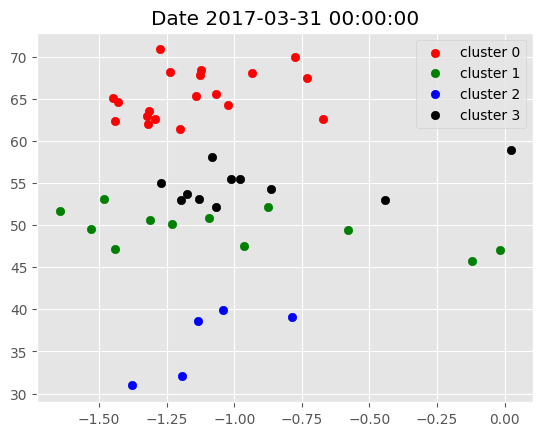

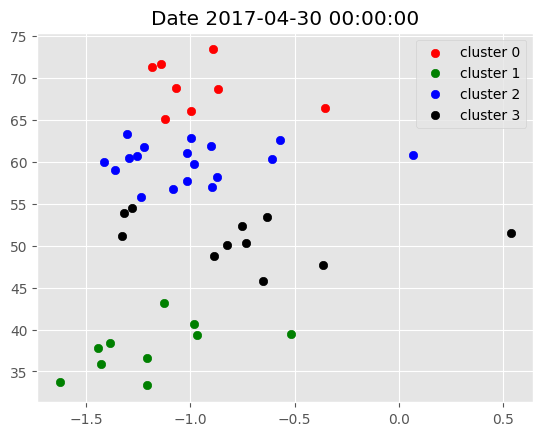

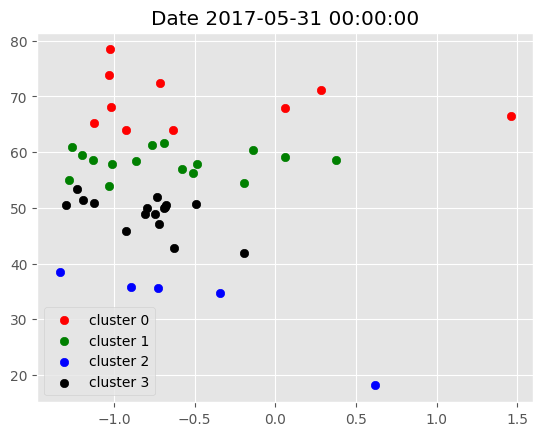

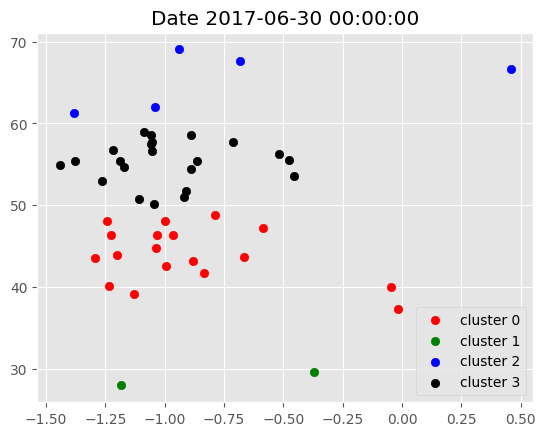

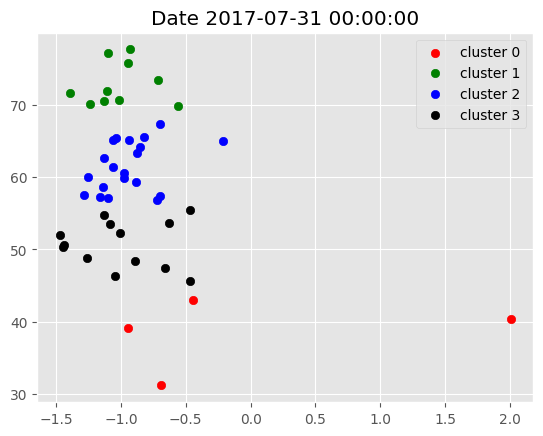

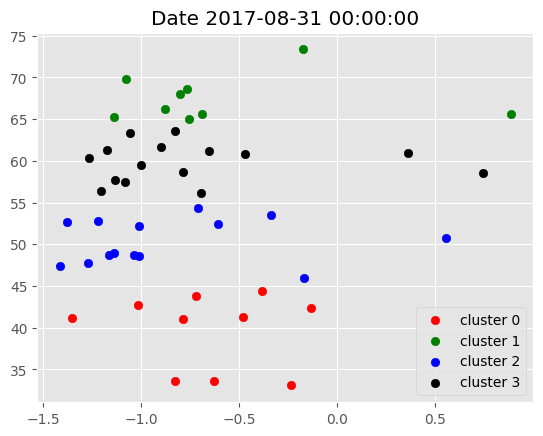

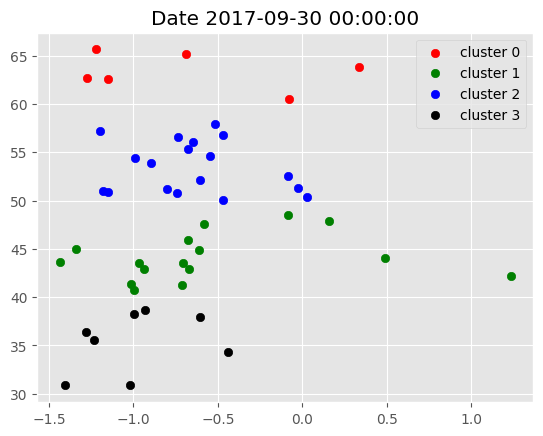

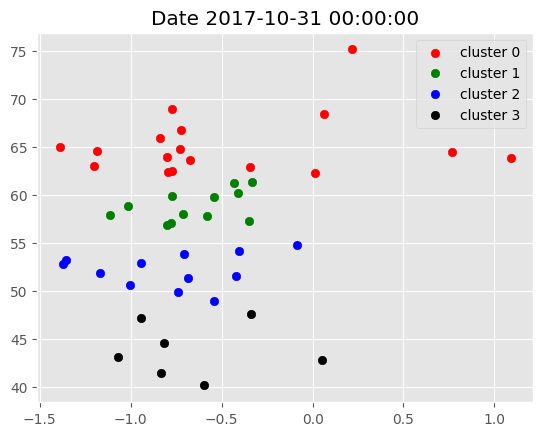

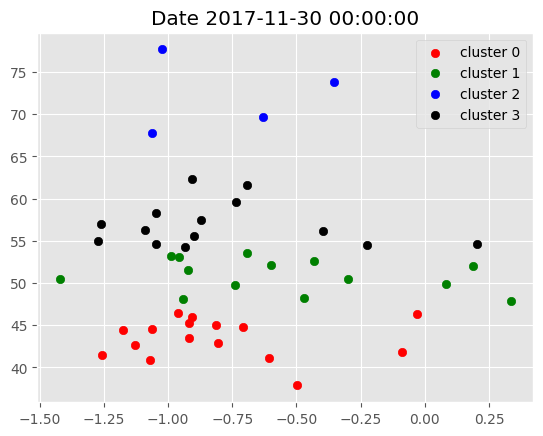

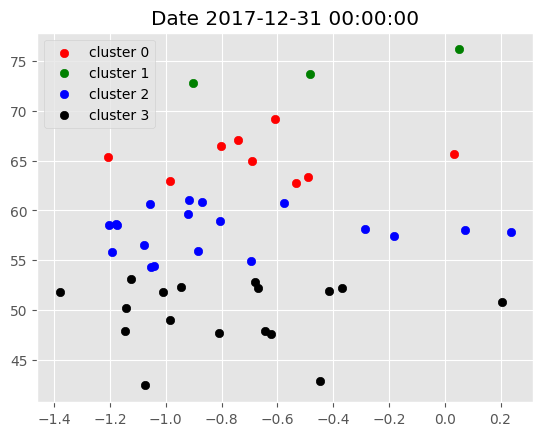

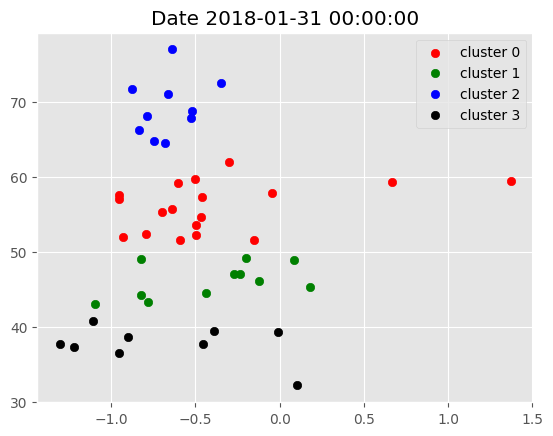

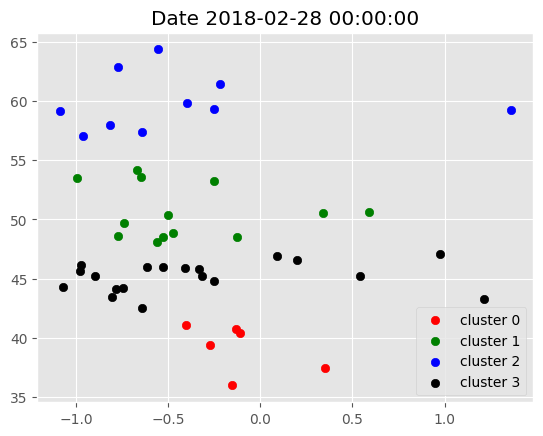

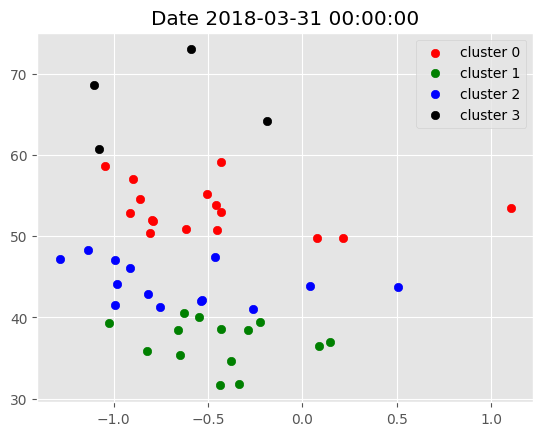

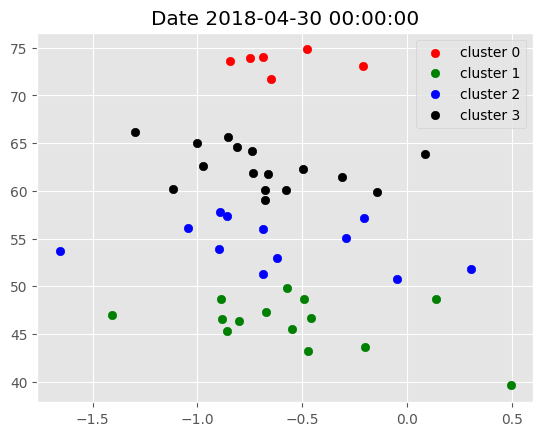

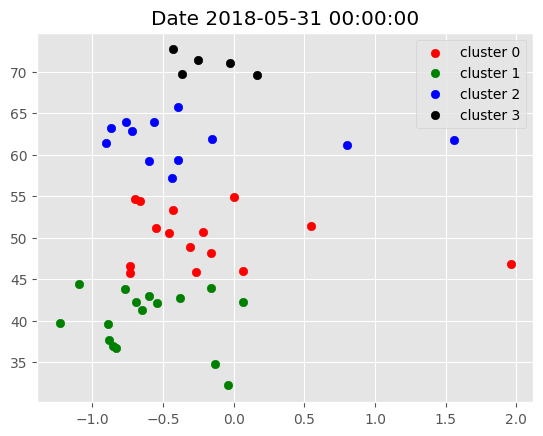

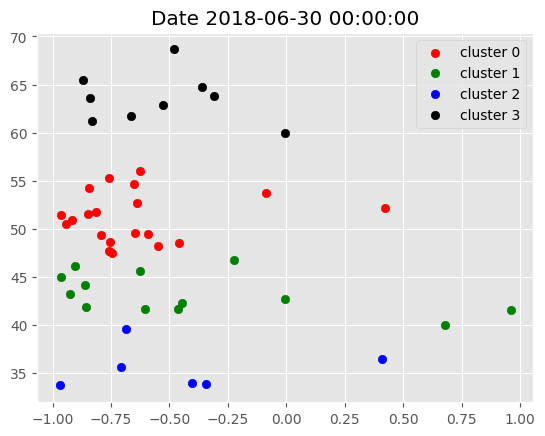

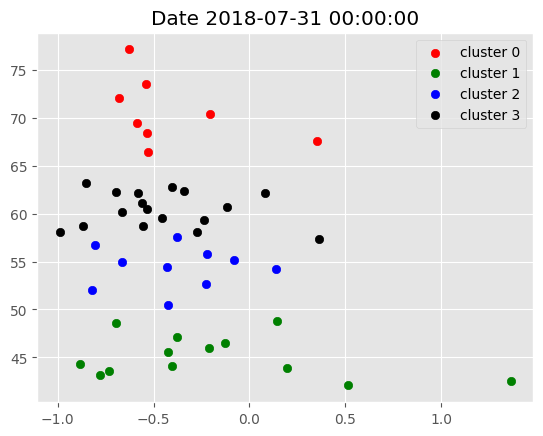

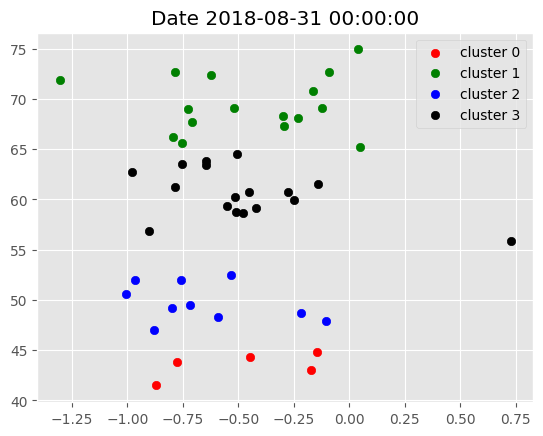

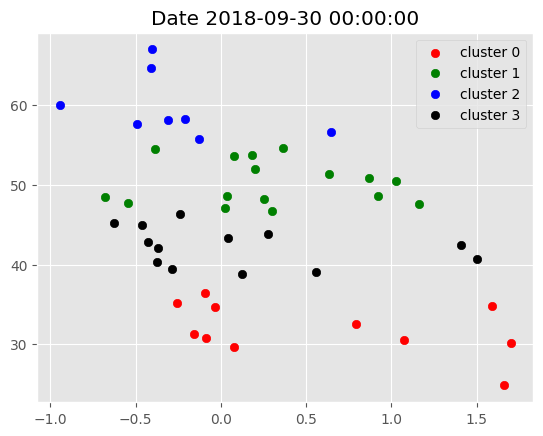

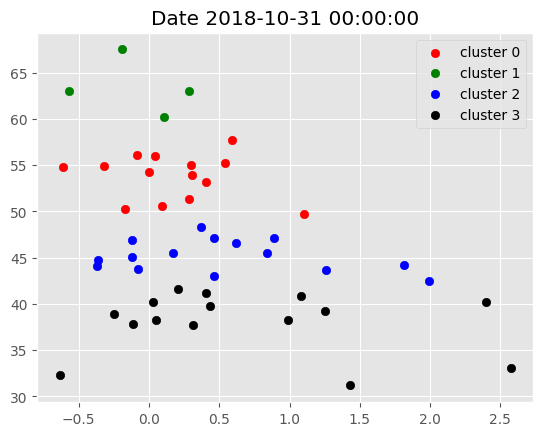

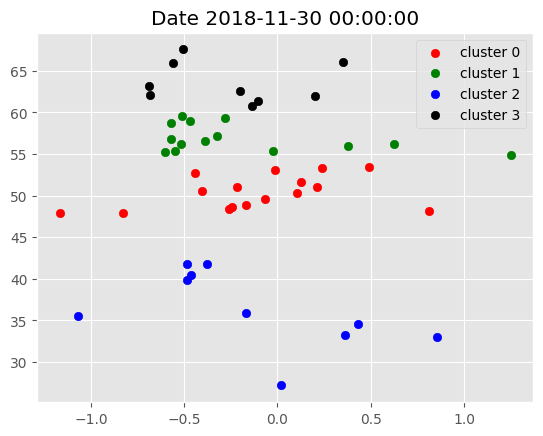

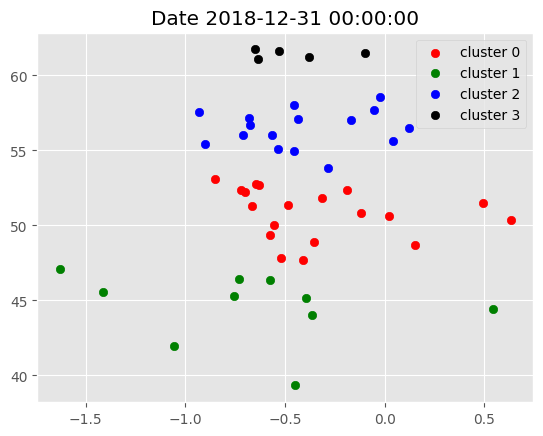

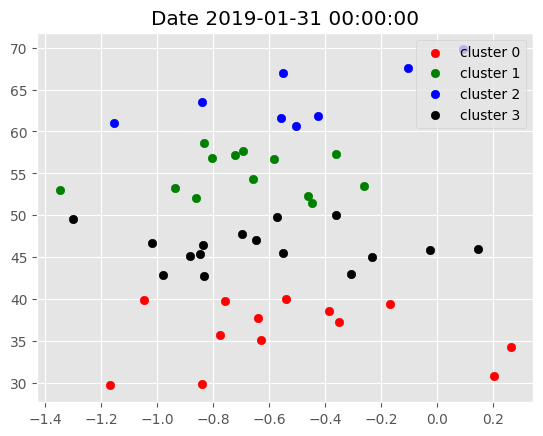

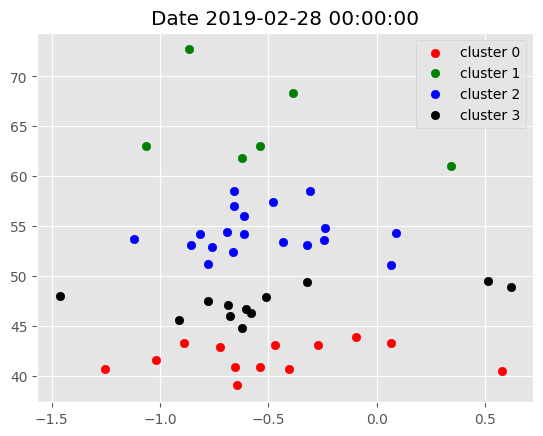

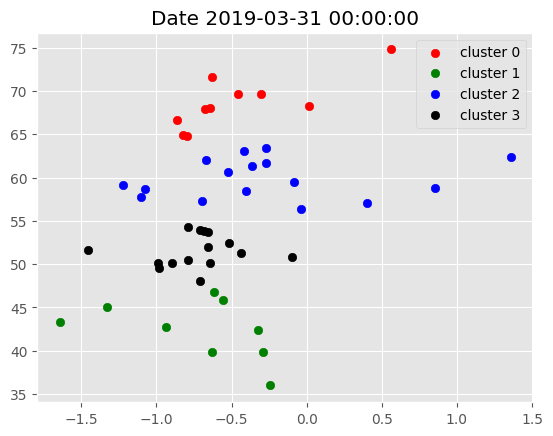

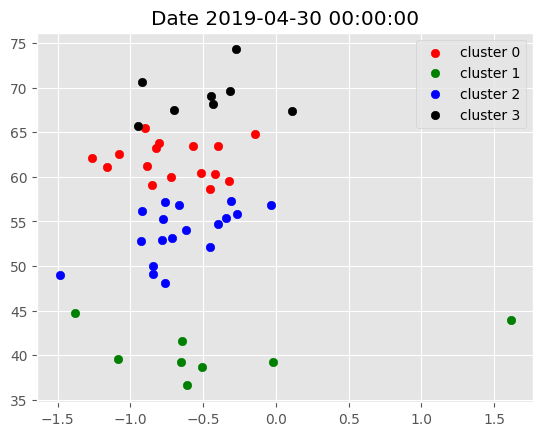

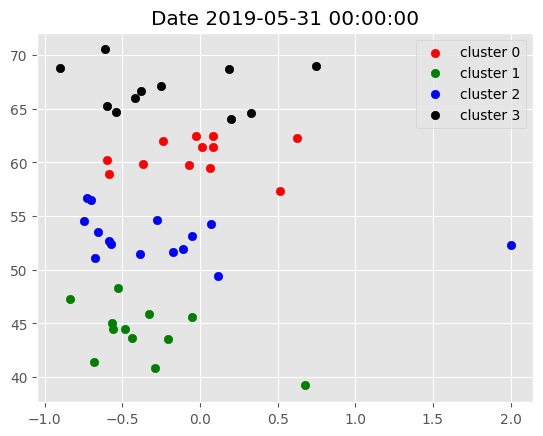

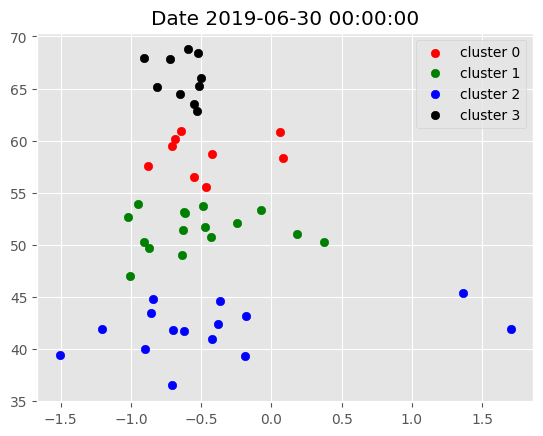

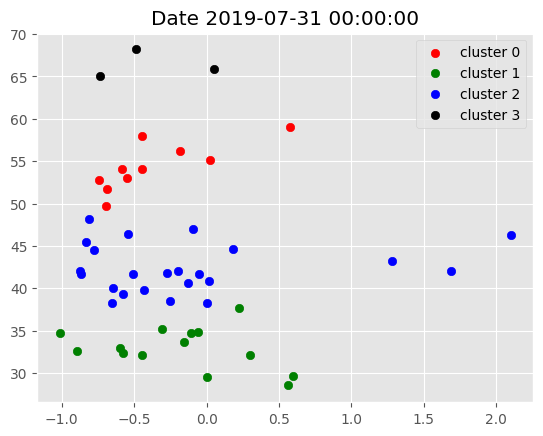

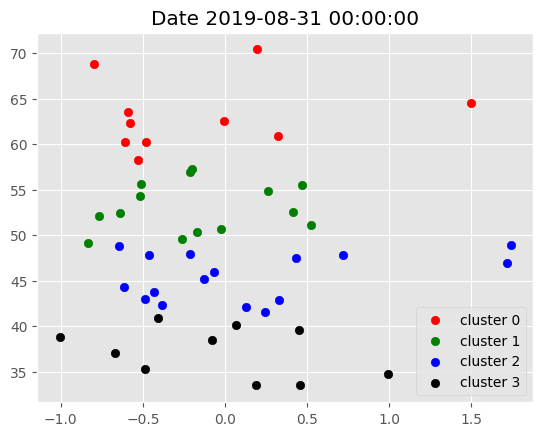

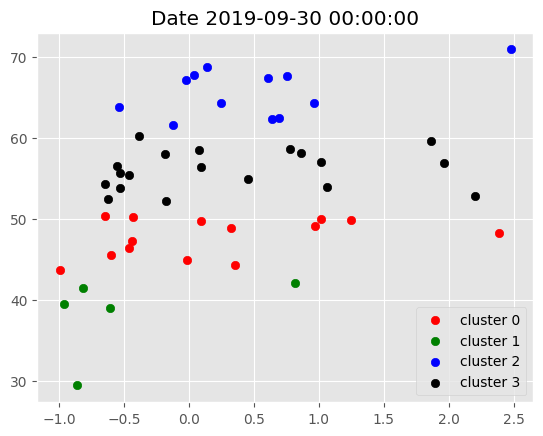

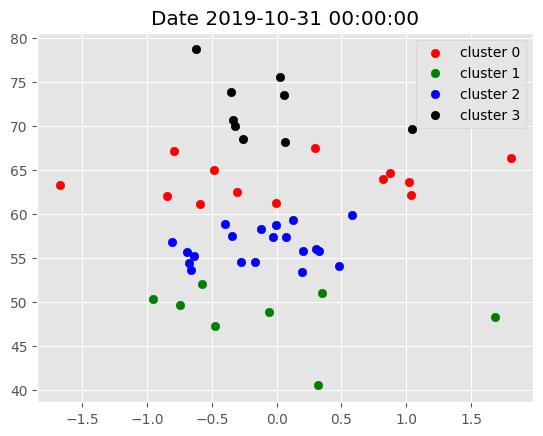

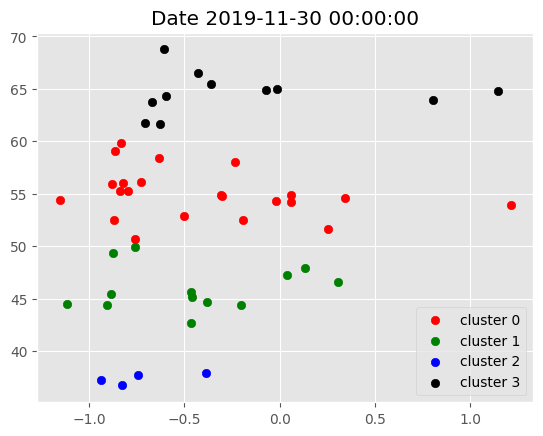

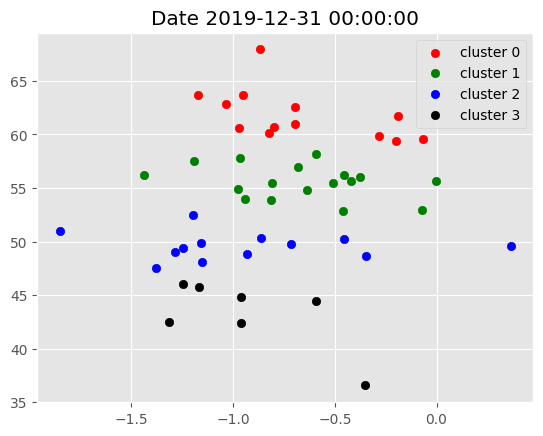

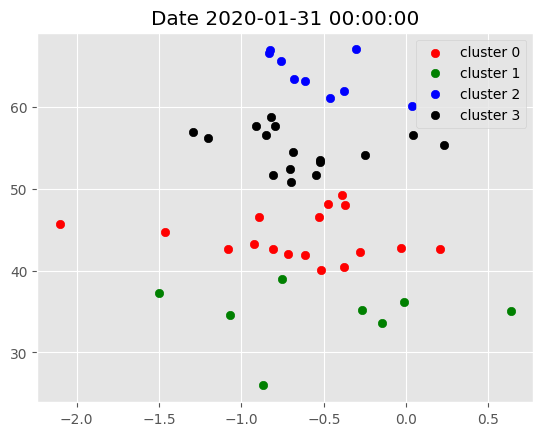

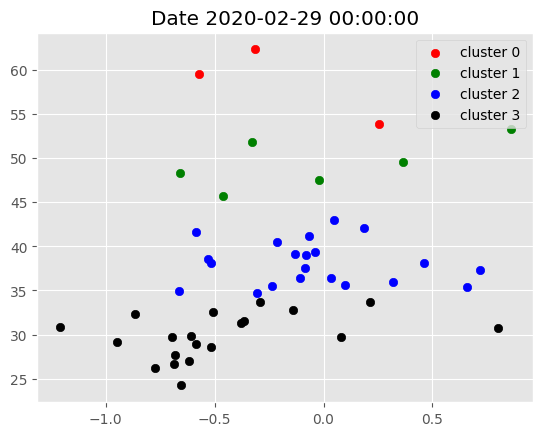

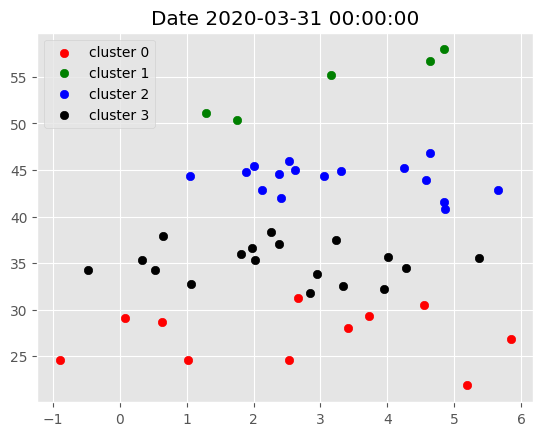

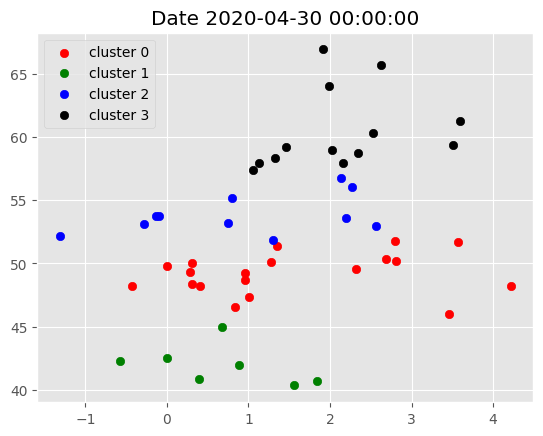

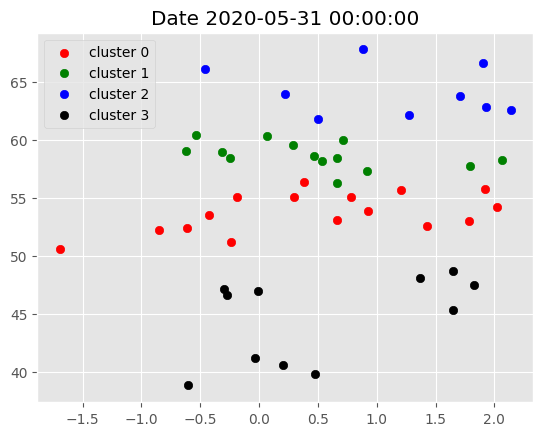

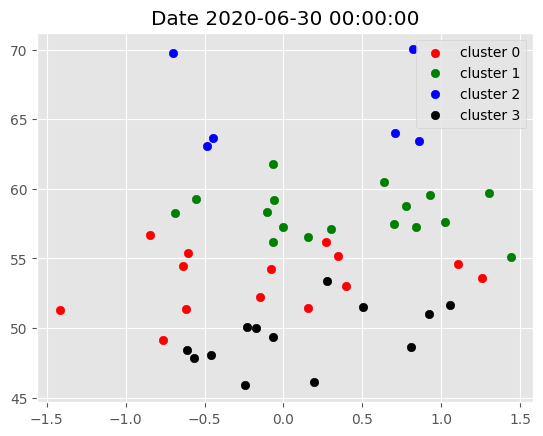

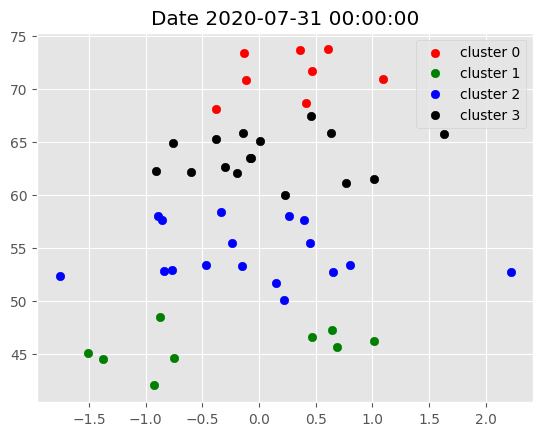

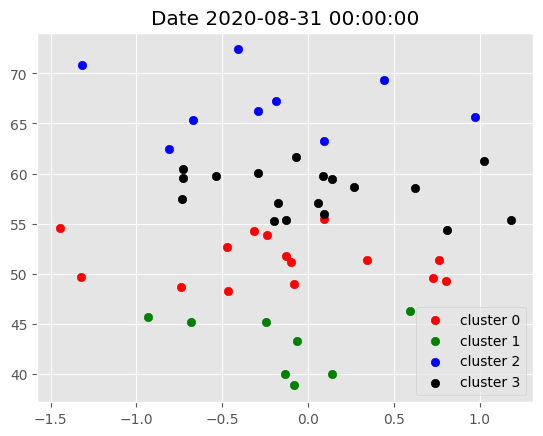

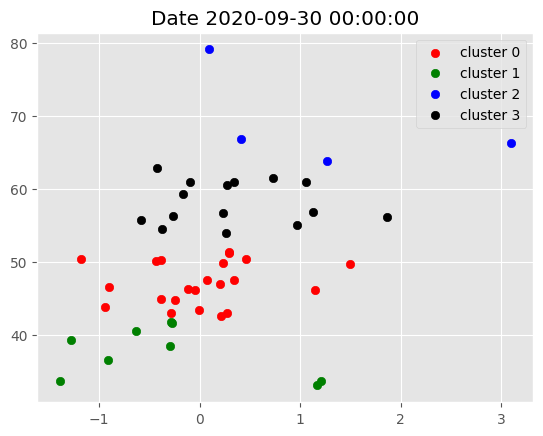

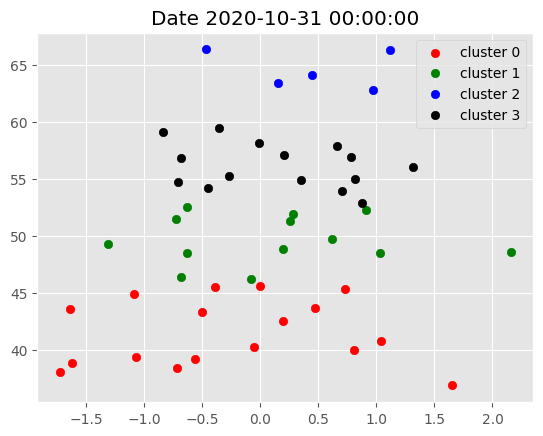

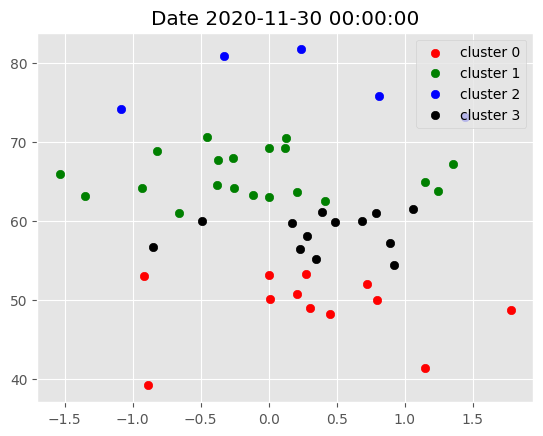

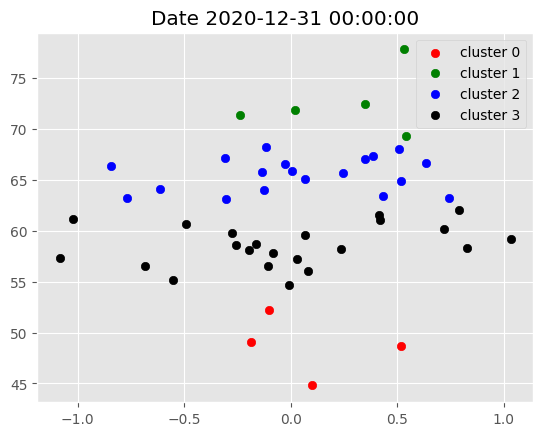

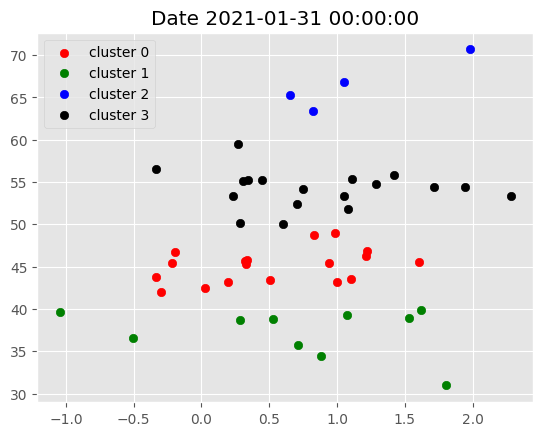

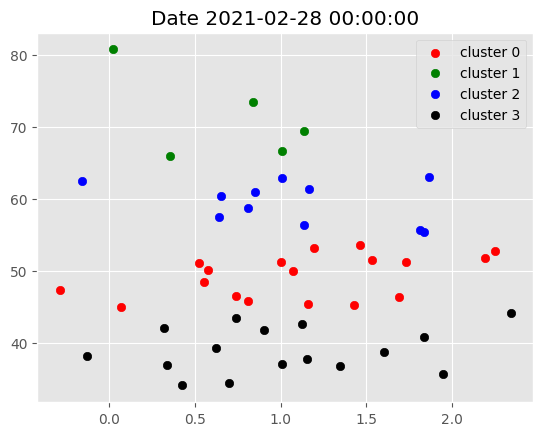

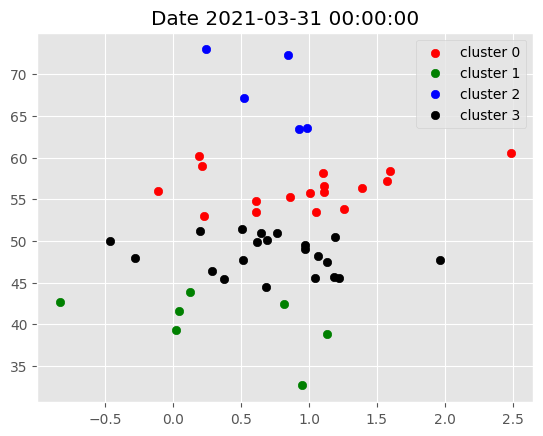

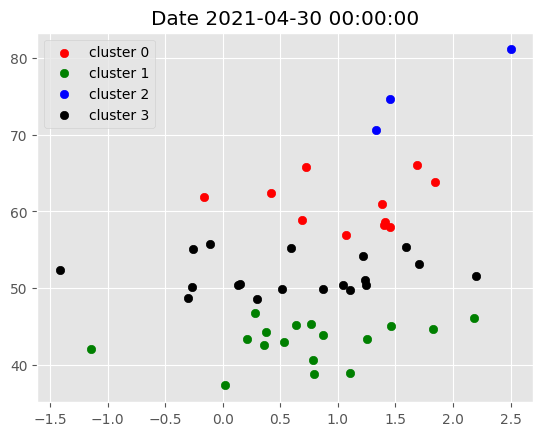

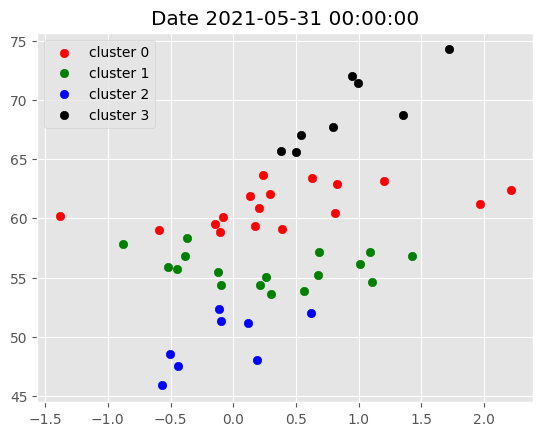

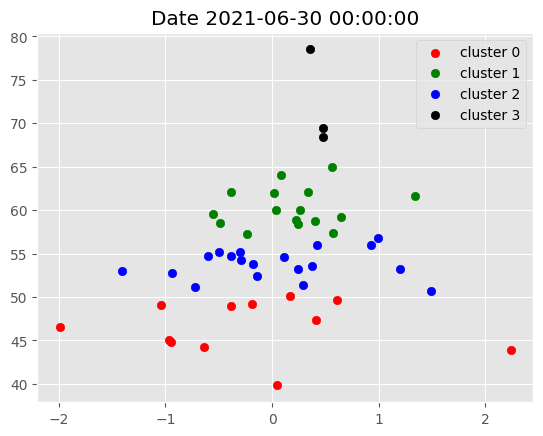

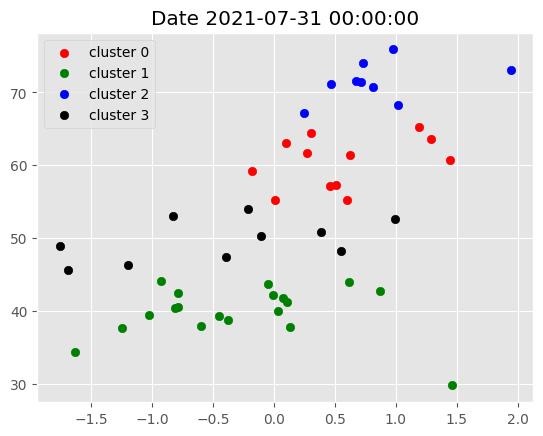

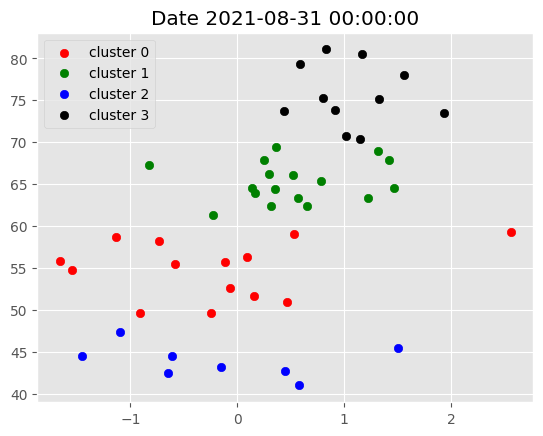

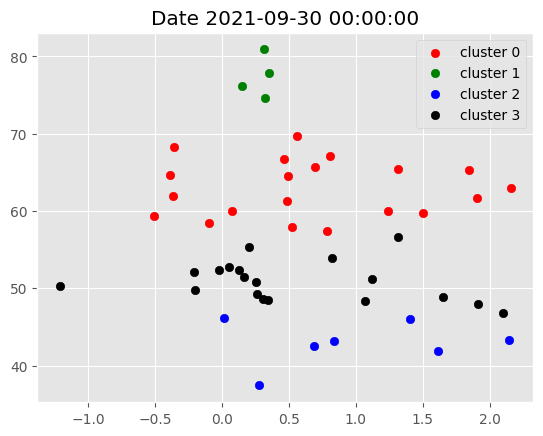

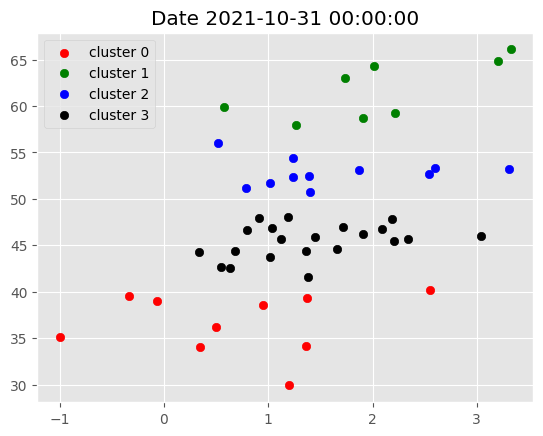

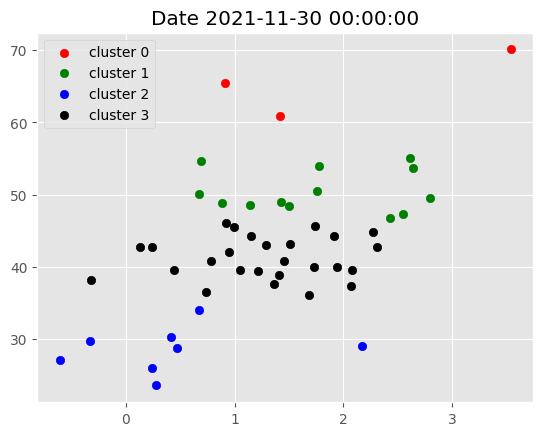

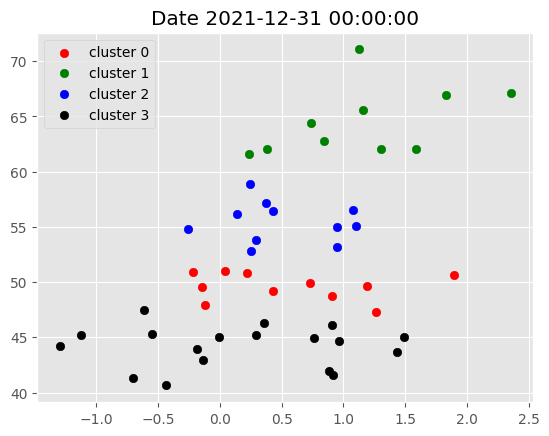

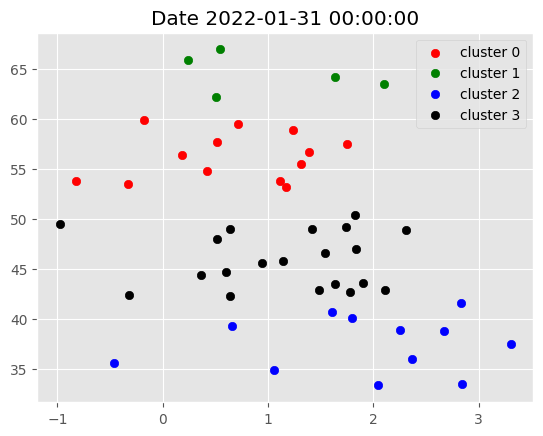

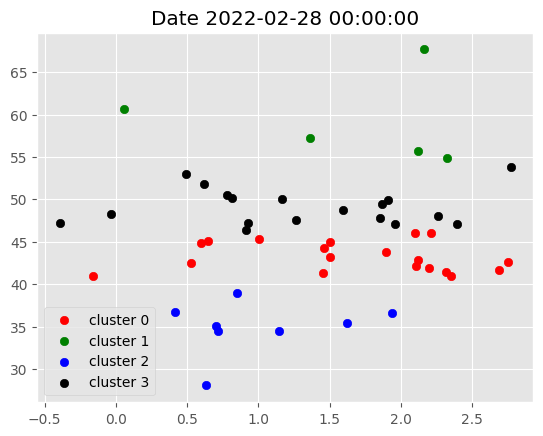

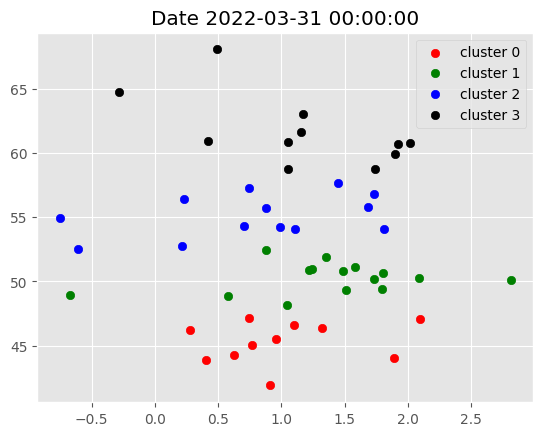

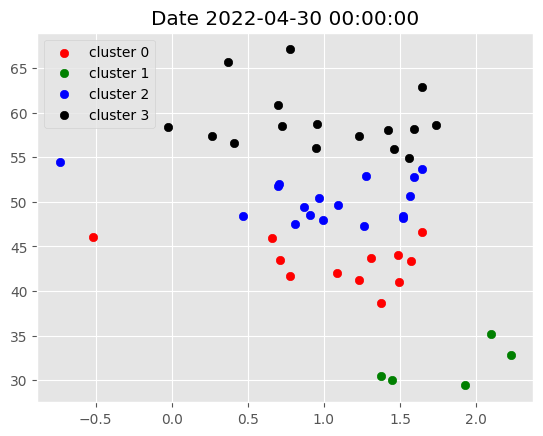

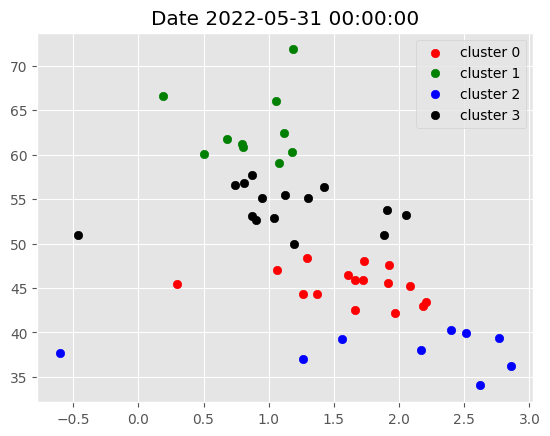

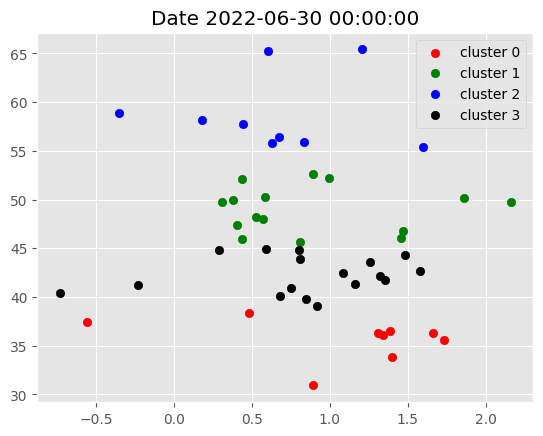

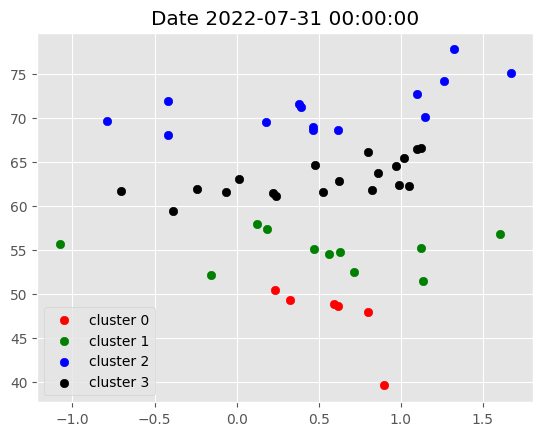

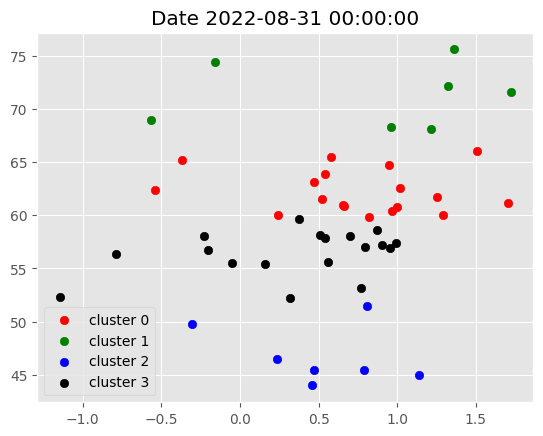

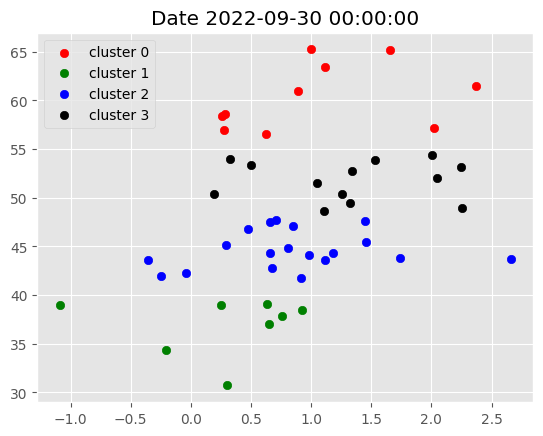

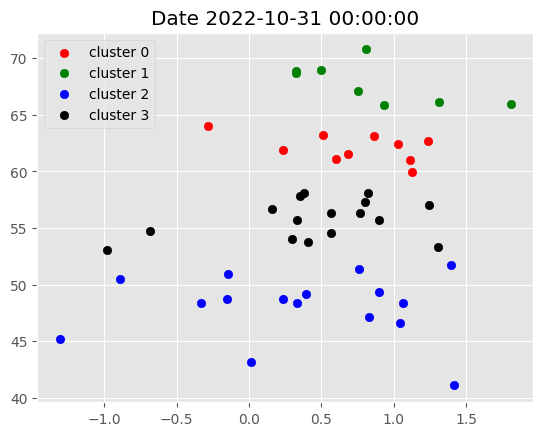

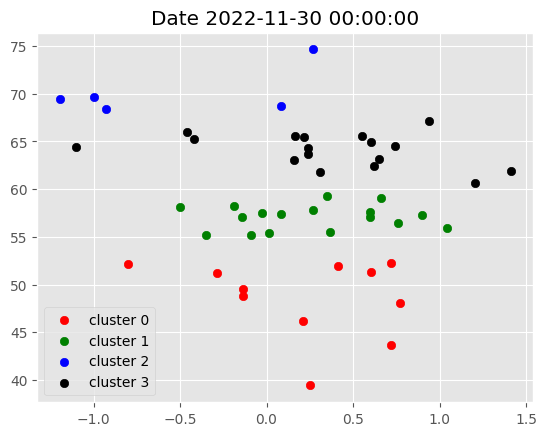

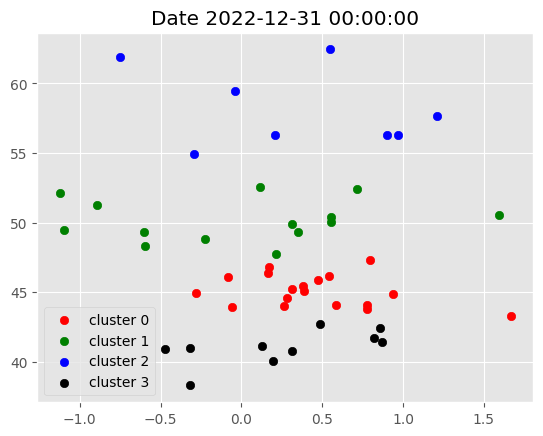

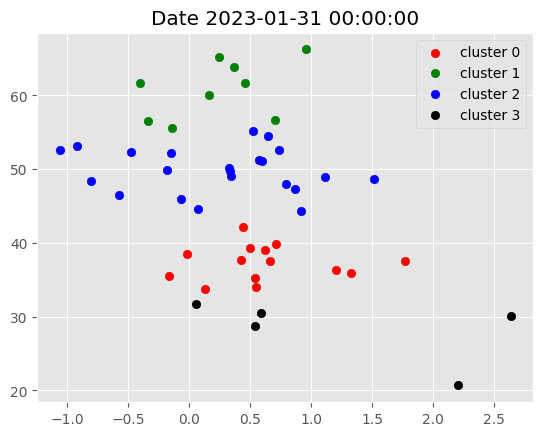

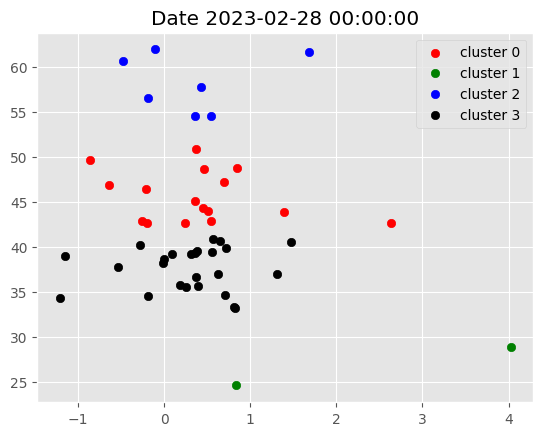

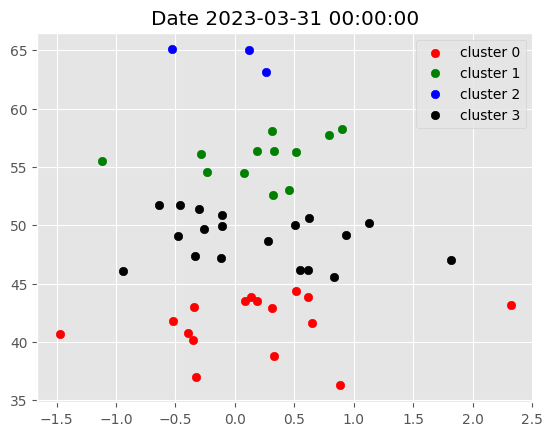

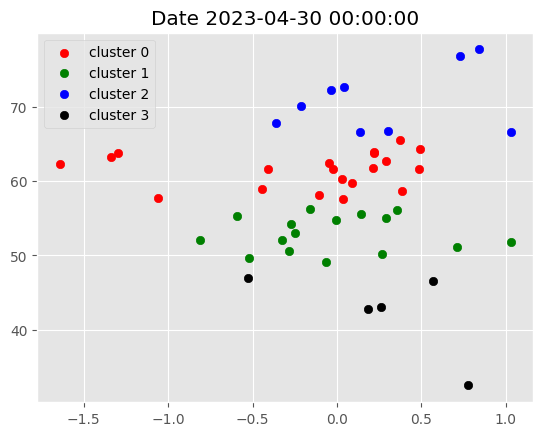

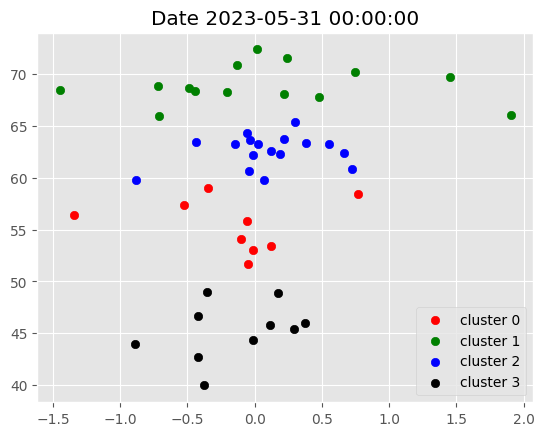

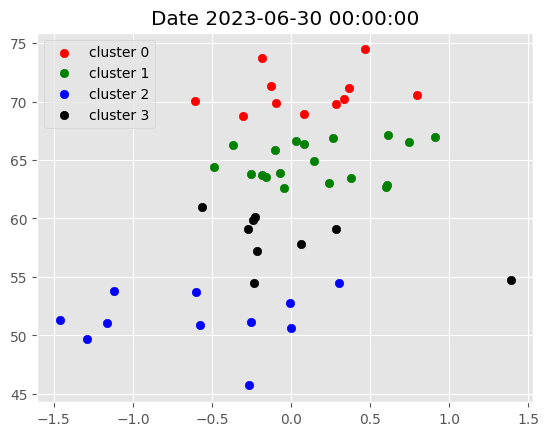

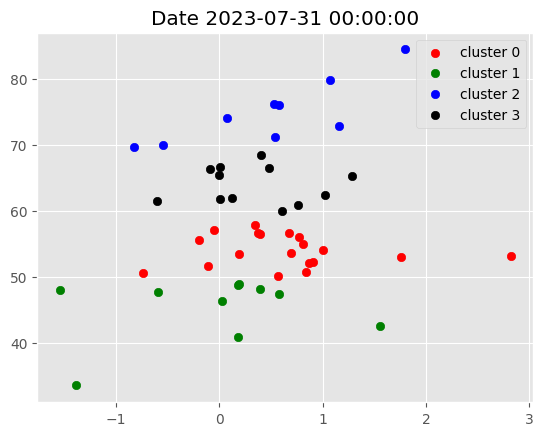

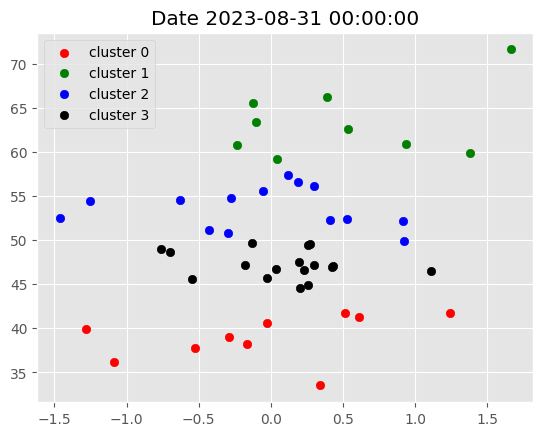

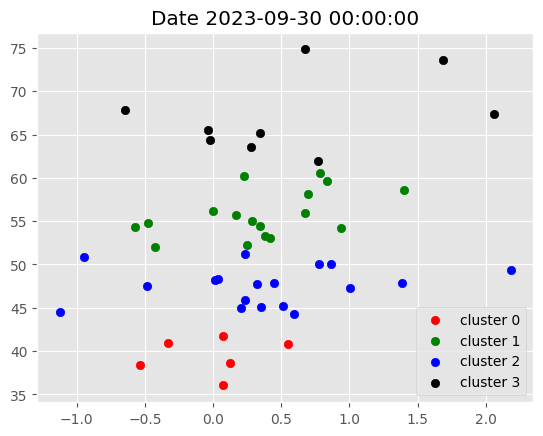

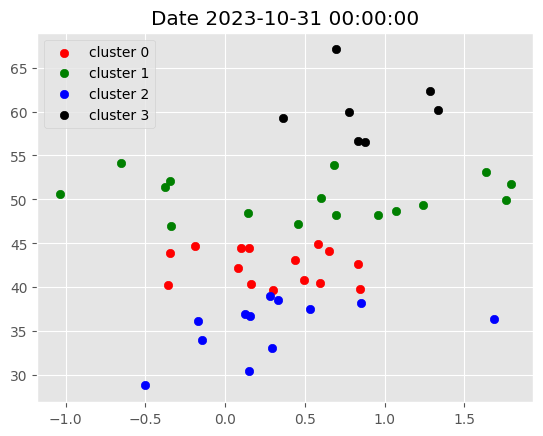

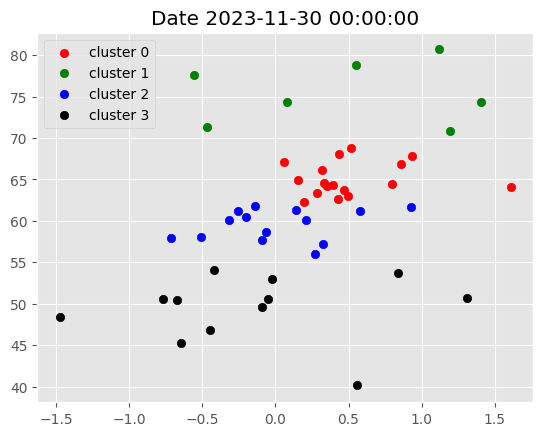

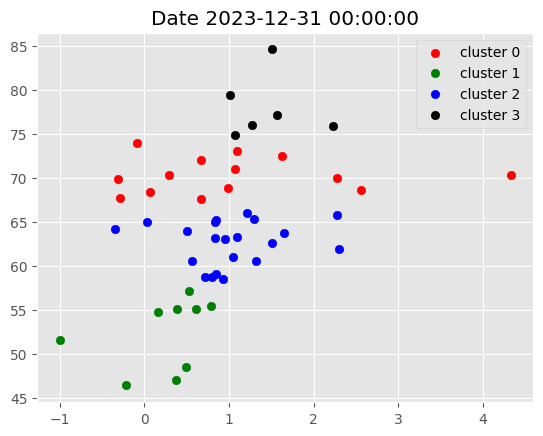

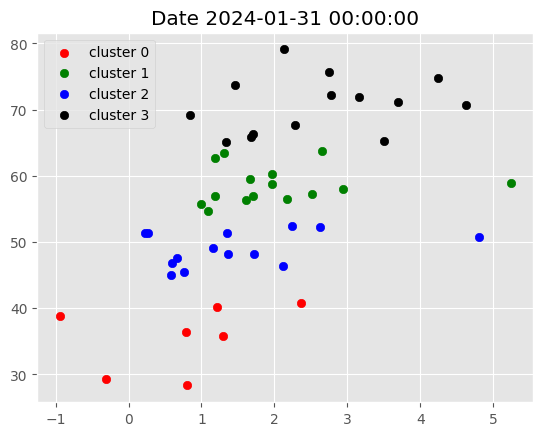

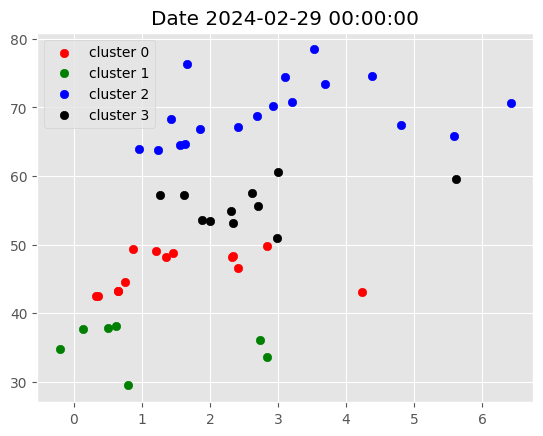

In [ ]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():

    g = data.xs(i, level=0)

    plt.title(f'Date {i}')

    plot_clusters(g)

In [ ]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:, 6] = target_rsi_values

initial_centroids

array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [ ]:
filtered_df = data[data['cluster']==3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:

    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()

fixed_dates

{'2017-04-01': ['BPCL.NS',
  'GRASIM.NS',
  'HCLTECH.NS',
  'HINDALCO.NS',
  'INFY.NS',
  'ITC.NS',
  'JSWSTEEL.NS',
  'NTPC.NS',
  'POWERGRID.NS',
  'TATASTEEL.NS',
  'UPL.NS'],
 '2017-05-01': ['ADANIENT.NS',
  'ADANIPORTS.NS',
  'AXISBANK.NS',
  'BAJAJ-AUTO.NS',
  'ICICIBANK.NS',
  'ITC.NS',
  'NTPC.NS',
  'ONGC.NS',
  'TATAMOTORS.NS',
  'TITAN.NS',
  'WIPRO.NS'],
 '2017-06-01': ['ADANIENT.NS',
  'ADANIPORTS.NS',
  'APOLLOHOSP.NS',
  'BAJAJ-AUTO.NS',
  'BAJAJFINSV.NS',
  'BRITANNIA.NS',
  'DRREDDY.NS',
  'INFY.NS',
  'JSWSTEEL.NS',
  'NTPC.NS',
  'ONGC.NS',
  'RELIANCE.NS',
  'SBIN.NS',
  'TATACONSUM.NS',
  'TITAN.NS',
  'ULTRACEMCO.NS'],
 '2017-07-01': ['ADANIENT.NS',
  'ADANIPORTS.NS',
  'APOLLOHOSP.NS',
  'AXISBANK.NS',
  'BAJFINANCE.NS',
  'BRITANNIA.NS',
  'CIPLA.NS',
  'DIVISLAB.NS',
  'DRREDDY.NS',
  'HCLTECH.NS',
  'HEROMOTOCO.NS',
  'HINDUNILVR.NS',
  'ICICIBANK.NS',
  'INDUSINDBK.NS',
  'JSWSTEEL.NS',
  'KOTAKBANK.NS',
  'MARUTI.NS',
  'NESTLEIND.NS',
  'POWERGRID.NS',
  'R

In [ ]:
# Define portfolio optimization function

In [ ]:
pip install pyportfolioopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.6 MB/s eta 0:00:00


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):

    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)

    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)

    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')

    weights = ef.max_sharpe()

    return ef.clean_weights()

In [ ]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

new_df

[*********************100%%**********************]  50 of 50 completed


Price         Adj Close                                            \
Ticker      ADANIENT.NS ADANIPORTS.NS APOLLOHOSP.NS ASIANPAINT.NS   
Date                                                                
2016-03-31    39.402485    237.887421   1297.792358    822.555908   
2016-04-01    40.630478    233.277557   1316.976685    824.071533   
2016-04-04    43.006359    232.941437   1322.248779    839.368958   
2016-04-05    39.749527    217.287155   1315.317017    823.929321   
2016-04-06    40.310123    215.462433   1317.171997    817.725037   
...                 ...           ...           ...           ...   
2024-02-12  3169.750000   1249.349976   6614.450195   2953.800049   
2024-02-13  3178.449951   1264.800049   6718.899902   2971.600098   
2024-02-14  3207.199951   1267.849976   6754.100098   2976.399902   
2024-02-15  3193.800049   1267.050049   6627.600098   3016.550049   
2024-02-16  3223.600098   1306.849976   6600.549805   3007.899902   

Price                                                              \
Ticker      AXISBANK.NS BAJAJ-AUTO.NS BAJAJFINSV.NS BAJFINANCE.NS   
Date                                                                
2016-03-31   434.108917   1893.576294    170.553802    676.747192   
2016-04-01   439.728943   1904.516113    174.107224    672.187744   
2016-04-04   434.695343   1926.868286    174.560730    671.425354   
2016-04-05   422.820068   1884.840332    174.311554    666.914795   
2016-04-06   415.049774   1885.115723    175.971146    679.034241   
...                 ...           ...           ...           ...   
2024-02-12  1046.699951   7829.950195   1557.250000   6569.149902   
2024-02-13  1070.750000   7917.399902   1568.000000   6603.649902   
2024-02-14  1096.849976   8083.299805   1579.699951   6646.500000   
2024-02-15  1072.199951   8123.049805   1569.400024   6619.399902   
2024-02-16  1068.750000   8325.049805   1575.900024   6619.200195   

Price                                 ...       Volume                \
Ticker     BHARTIARTL.NS     BPCL.NS  ... SUNPHARMA.NS TATACONSUM.NS   
Date                                  ...                              
2016-03-31    303.655426  192.523987  ...      5230705       1627181   
2016-04-01    290.368347  188.894073  ...      1654746       1532533   
2016-04-04    301.664520  188.840820  ...      1239310        831737   
2016-04-05    286.083557  189.564713  ...      2570634       1663091   
2016-04-06    289.546051  189.511520  ...      1809628       1327276   
...                  ...         ...  ...          ...           ...   
2024-02-12   1118.699951  590.450012  ...      4059288        898953   
2024-02-13   1117.849976  584.299988  ...      4687838        886148   
2024-02-14   1115.849976  623.650024  ...      2105672       1206706   
2024-02-15   1120.699951  652.750000  ...      2161691       1278358   
2024-02-16   1120.000000  654.599976  ...      3480813       1213095   

Price                                                             \
Ticker     TATAMOTORS.NS TATASTEEL.NS   TCS.NS TECHM.NS TITAN.NS   
Date                                                               
2016-03-31      10738707    140121880  4363964  4630177   895578   
2016-04-01       5683771     58463365  3041400  2394963   517494   
2016-04-04       6011729     54242901  1752352  1708093   796436   
2016-04-05       6058241     60071721  1491794  1430387   829255   
2016-04-06       7323269    153148901  1763150  2671558  1075449   
...                  ...          ...      ...      ...      ...   
2024-02-12       7286778     36477544  1013716  1149683   487283   
2024-02-13       8574218     39155909  1257415  1127361   796060   
2024-02-14       6570939     29141690  1391283  3426103  1046318   
2024-02-15       6430799     31587387  1091582  1703763   759063   
2024-02-16      12822069     22300853  1307424  1994482   915484   

Price                                        
Ticker     ULTRACEMCO.NS   UPL.NS  WIPRO.NS  
Date        

In [ ]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():

    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')

        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]

        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))

            weights = pd.DataFrame(weights, index=pd.Series(0))

            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')

        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T

        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Max Sharpe Optimization failed for 2017-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2017-11-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-06-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-07-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-11-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-12-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-01-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-08-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-09-01, Continuing with Equal-Weights

,Strategy Return
date,
2017-04-03,-0.002946
2017-04-05,0.004831
2017-04-06,0.004649
2017-04-07,-0.002810
2017-04-10,0.006815
...,...
2024-02-12,-0.013521
2024-02-13,0.008101
2024-02-14,0.013361


In [ ]:
from datetime import date as dt

In [ ]:
spy = yf.download(tickers='NSE',
                  start='2015-01-01',
                  end=dt.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'Nifty 50 Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

[*********************100%%**********************]  1 of 1 completed


,Strategy Return,Nifty 50 Buy&Hold
2017-04-03,-0.002946,0.000000
2017-04-05,0.004831,-0.015326
2017-04-06,0.004649,-0.011651
2017-04-07,-0.002810,0.000000
2017-04-10,0.006815,-0.003914
...,...,...
2022-02-23,0.000906,-0.048790
2022-02-24,-0.058696,-0.007528
2022-02-25,0.028542,-0.017790
2022-02-28,0.016403,-0.002567


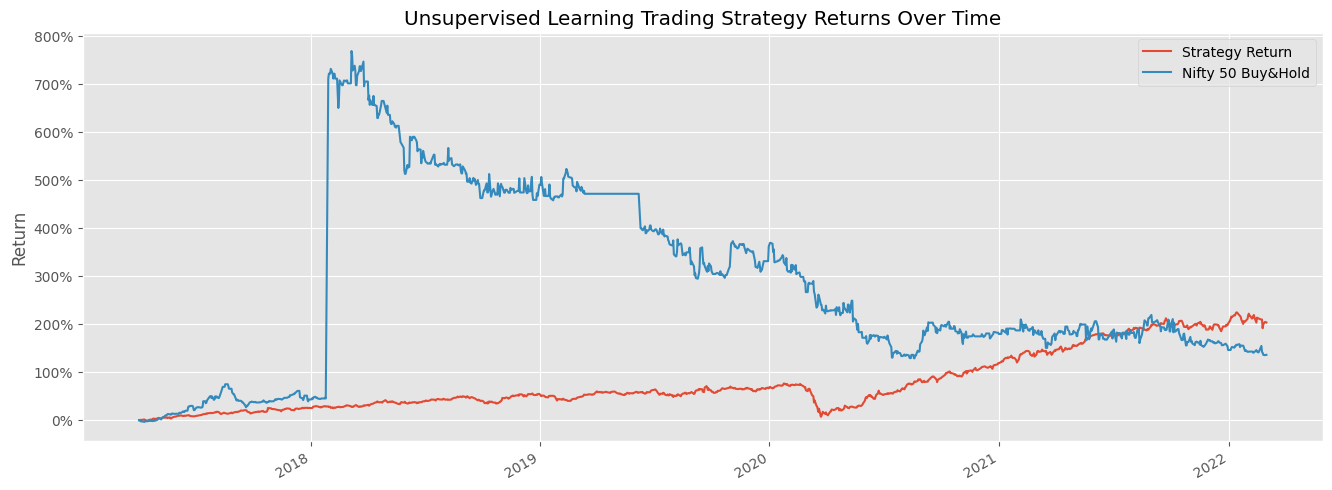

In [ ]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()